WD - Presentation - 1st Topic

DATA CLEANUP

In [1]:
# Import dependencies and setup pathlib to load csv files
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import nasdaqdatalink as nasdaq
import os

api_key = os.path.join('Resources', 'nasdaq_api_key.txt')
nasdaq.read_key(api_key)

In [2]:
zillow_regions = nasdaq.get_table("ZILLOW/REGIONS", paginate = True)
zillow_regions.head()

region_id region_type                                            region
None                                                                        
0        99999         zip  98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1        99998         zip              98846;WA;nan;Pateros;Okanogan County
2        99997         zip   98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip             98844;WA;nan;Oroville;Okanogan County
4        99995         zip      98843;WA;Wenatchee, WA;Orondo;Douglas County

In [3]:
zillow_iraw = nasdaq.get_table("ZILLOW/DATA", indicator_id = 'IRAW', paginate = True)
zillow_iraw

indicator_id region_id       date      value
None                                               
0              IRAW    845172 2023-10-07      138.0
1              IRAW    845172 2023-09-30      141.0
2              IRAW    845172 2023-09-23      140.0
3              IRAW    845172 2023-09-16      145.0
4              IRAW    845172 2023-09-09      144.0
...             ...       ...        ...        ...
266886         IRAW    102001 2017-11-04  1308880.0
266887         IRAW    102001 2017-10-28  1314298.0
266888         IRAW    102001 2017-10-21  1330402.0
266889         IRAW    102001 2017-10-14  1335509.0
266890         IRAW    102001 2017-10-07  1336948.0

[266891 rows x 4 columns]

In [4]:
# Inner merge both datasets into one;
# Only keep rows in the left DataFrame (zillow_iram) where value of 'region_id' exists on both DataFrames
merged_df = pd.merge(zillow_iraw, zillow_regions, how = "left", on = ["region_id"])
merged_df

indicator_id region_id       date      value region_type         region
0              IRAW    845172 2023-10-07      138.0       metro   Winfield, KS
1              IRAW    845172 2023-09-30      141.0       metro   Winfield, KS
2              IRAW    845172 2023-09-23      140.0       metro   Winfield, KS
3              IRAW    845172 2023-09-16      145.0       metro   Winfield, KS
4              IRAW    845172 2023-09-09      144.0       metro   Winfield, KS
...             ...       ...        ...        ...         ...            ...
266886         IRAW    102001 2017-11-04  1308880.0       metro  United States
266887         IRAW    102001 2017-10-28  1314298.0       metro  United States
266888         IRAW    102001 2017-10-21  1330402.0       metro  United States
266889         IRAW    102001 2017-10-14  1335509.0       metro  United States
266890         IRAW    102001 2017-10-07  1336948.0       metro  United States

[266891 rows x 6 columns]

In [5]:
merged_df[['City', 'State']] = merged_df['region'].str.split(', ', expand = True)

merged_df

indicator_id region_id       date      value region_type  \
0              IRAW    845172 2023-10-07      138.0       metro   
1              IRAW    845172 2023-09-30      141.0       metro   
2              IRAW    845172 2023-09-23      140.0       metro   
3              IRAW    845172 2023-09-16      145.0       metro   
4              IRAW    845172 2023-09-09      144.0       metro   
...             ...       ...        ...        ...         ...   
266886         IRAW    102001 2017-11-04  1308880.0       metro   
266887         IRAW    102001 2017-10-28  1314298.0       metro   
266888         IRAW    102001 2017-10-21  1330402.0       metro   
266889         IRAW    102001 2017-10-14  1335509.0       metro   
266890         IRAW    102001 2017-10-07  1336948.0       metro   

               region           City State  
0        Winfield, KS       Winfield    KS  
1        Winfield, KS       Winfield    KS  
2        Winfield, KS       Winfield    KS  
3        Winfield, KS       Winfield    KS  
4        Winfield, KS       Winfield    KS  
...               ...            ...   ...  
266886  United States  United States  None  
266887  United States  United States  None  
266888  United States  United States  None  
266889  United States  United States  None  
266890  United States  United States  None  

[266891 rows x 8 columns]

In [6]:
def print_unique_states(dataframe):
    unique_states = dataframe["State"].unique()
    count_states = dataframe["State"].nunique()

    print(f"There are {count_states} States found in the Merged DataFrame:")

    for state in unique_states :
        print(state)


print_unique_states(merged_df)

There are 66 States found in the Merged DataFrame:
KS
SC
IN
TX
IL
WV
LA
NH
AL
AZ
NY
OH
MS
PA
NM
IA
AR
MN
KY
TN
WI
NV
OK
MA
HI
OR
UT; UT
CO
CA
ID
OH; OH
NC
NC; NC
WA
FL
MI
WV; WV
KS; KS
GA
MI; MI
MA; MA
MD
VA
SD
ND
MO
DC
NJ
UT
AL; AL
CT
WY
NE
VT
RI
AZ; AZ
ME
IL; IL
IA; IA
MT
WI; WI
TX; TX
AK
DE
NH; NH
LA; LA
None


In [7]:
for index, row in merged_df.iterrows() :
    state_element = row["State"]
    
    if state_element is not None and ';' in state_element :
        new_state = state_element.split(';', 1)[0]
        
        merged_df.at[index, "State"] = new_state
        

merged_df = merged_df.dropna(subset = ["State"])

print(f"There are {len(merged_df)} rows in the DataFrame.\n")

print_unique_states(merged_df)

There are 266577 rows in the DataFrame.

There are 51 States found in the Merged DataFrame:
KS
SC
IN
TX
IL
WV
LA
NH
AL
AZ
NY
OH
MS
PA
NM
IA
AR
MN
KY
TN
WI
NV
OK
MA
HI
OR
UT
CO
CA
ID
NC
WA
FL
MI
GA
MD
VA
SD
ND
MO
DC
NJ
CT
WY
NE
VT
RI
ME
MT
AK
DE


In [8]:
columns_with_nan_values = merged_df.isnull().sum()

print(columns_with_nan_values)

print()

merged_df

indicator_id    0
region_id       0
date            0
value           0
region_type     0
region          0
City            0
State           0
dtype: int64



indicator_id region_id       date  value region_type        region  \
0              IRAW    845172 2023-10-07  138.0       metro  Winfield, KS   
1              IRAW    845172 2023-09-30  141.0       metro  Winfield, KS   
2              IRAW    845172 2023-09-23  140.0       metro  Winfield, KS   
3              IRAW    845172 2023-09-16  145.0       metro  Winfield, KS   
4              IRAW    845172 2023-09-09  144.0       metro  Winfield, KS   
...             ...       ...        ...    ...         ...           ...   
266572         IRAW    394297 2018-02-10  160.0       metro  Aberdeen, SD   
266573         IRAW    394297 2018-02-03  157.0       metro  Aberdeen, SD   
266574         IRAW    394297 2018-01-27  155.0       metro  Aberdeen, SD   
266575         IRAW    394297 2018-01-20  159.0       metro  Aberdeen, SD   
266576         IRAW    394297 2018-01-13  159.0       metro  Aberdeen, SD   

            City State  
0       Winfield    KS  
1       Winfield    KS  
2       Winfield    KS  
3       Winfield    KS  
4       Winfield    KS  
...          ...   ...  
266572  Aberdeen    SD  
266573  Aberdeen    SD  
266574  Aberdeen    SD  
266575  Aberdeen    SD  
266576  Aberdeen    SD  

[266577 rows x 8 columns]

In [9]:
merged_df.to_csv('./Resources/iraw_data.csv', index = False)

DATA ANALYSIS

In [10]:
# Load csv dataset file from 'Resources' folder
load_iraw_data = Path("Resources/iraw_data.csv")

# Read iram_data csv file and store dataset into new Pandas DataFrame
iraw_df = pd.read_csv(load_iraw_data, index_col = False)

# Only Region Type listed in the Dataset is 'Metro'
# Therefore, the scope of my dataset covers Active Sales Properties for Metropolitan USA
iraw_df

indicator_id  region_id        date  value region_type        region  \
0              IRAW     845172  2023-10-07  138.0       metro  Winfield, KS   
1              IRAW     845172  2023-09-30  141.0       metro  Winfield, KS   
2              IRAW     845172  2023-09-23  140.0       metro  Winfield, KS   
3              IRAW     845172  2023-09-16  145.0       metro  Winfield, KS   
4              IRAW     845172  2023-09-09  144.0       metro  Winfield, KS   
...             ...        ...         ...    ...         ...           ...   
266572         IRAW     394297  2018-02-10  160.0       metro  Aberdeen, SD   
266573         IRAW     394297  2018-02-03  157.0       metro  Aberdeen, SD   
266574         IRAW     394297  2018-01-27  155.0       metro  Aberdeen, SD   
266575         IRAW     394297  2018-01-20  159.0       metro  Aberdeen, SD   
266576         IRAW     394297  2018-01-13  159.0       metro  Aberdeen, SD   

            City State  
0       Winfield    KS  
1       Winfield    KS  
2       Winfield    KS  
3       Winfield    KS  
4       Winfield    KS  
...          ...   ...  
266572  Aberdeen    SD  
266573  Aberdeen    SD  
266574  Aberdeen    SD  
266575  Aberdeen    SD  
266576  Aberdeen    SD  

[266577 rows x 8 columns]

In [11]:
# According to the United States Census Bureau, the USA can be broken down into 4 Regions.
# Source: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

# Northeast Region tuple = 9 States
region_northeast = ('CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT')

# Midwest Region tuple = 12 States
region_midwest = ('IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI')

# South Region tuple = 17 States (including District of Columbia i.e. DC)
region_south = ('AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV')

# West Region tuple = 13 States
region_west = ('AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY')

# In the 'Census Region' column, add 'Northeast' for all rows if their 'State' value belongs in region_northeast
iraw_df.loc[iraw_df['State'].isin(region_northeast), 'Census Region'] = "Northeast"

# In the 'Census Region' column, add 'Midwest' for all rows if their 'State' value belongs in region_midwest
iraw_df.loc[iraw_df['State'].isin(region_midwest), 'Census Region'] = "Midwest"

# In the 'Census Region' column, add 'South' for all rows if their 'State' value belongs in region_south
iraw_df.loc[iraw_df['State'].isin(region_south), 'Census Region'] = "South"

# In the 'Census Region' column, add 'South' for all rows if their 'State' value belongs in region_west
iraw_df.loc[iraw_df['State'].isin(region_west), 'Census Region'] = "West"

iraw_df

indicator_id  region_id        date  value region_type        region  \
0              IRAW     845172  2023-10-07  138.0       metro  Winfield, KS   
1              IRAW     845172  2023-09-30  141.0       metro  Winfield, KS   
2              IRAW     845172  2023-09-23  140.0       metro  Winfield, KS   
3              IRAW     845172  2023-09-16  145.0       metro  Winfield, KS   
4              IRAW     845172  2023-09-09  144.0       metro  Winfield, KS   
...             ...        ...         ...    ...         ...           ...   
266572         IRAW     394297  2018-02-10  160.0       metro  Aberdeen, SD   
266573         IRAW     394297  2018-02-03  157.0       metro  Aberdeen, SD   
266574         IRAW     394297  2018-01-27  155.0       metro  Aberdeen, SD   
266575         IRAW     394297  2018-01-20  159.0       metro  Aberdeen, SD   
266576         IRAW     394297  2018-01-13  159.0       metro  Aberdeen, SD   

            City State Census Region  
0       Winfield    KS       Midwest  
1       Winfield    KS       Midwest  
2       Winfield    KS       Midwest  
3       Winfield    KS       Midwest  
4       Winfield    KS       Midwest  
...          ...   ...           ...  
266572  Aberdeen    SD       Midwest  
266573  Aberdeen    SD       Midwest  
266574  Aberdeen    SD       Midwest  
266575  Aberdeen    SD       Midwest  
266576  Aberdeen    SD       Midwest  

[266577 rows x 9 columns]

In [12]:
# Function to obtain the season for the given date
def get_season (date):
    
    # Get the month and day of current date
    month = date.month
    day = date.day
   
    # If Month is December or January or February, return Winter
    if (month == 12) or (month <= 2) :
        return 'Winter'
    
    # Else If Month is between March and May, return Spring
    elif 3 < month <= 5:
        return 'Spring'
    
    # Else If Month is between June and August, return Summer
    elif 6 < month <= 8:
        return 'Summer'
    
    # Otherwise, Return Fall
    else:
        return 'Fall'


# Further aggregation is required
# Aggregate Active Sales Properties by Census Region & Date
groupby_usa_region = iraw_df.groupby(["Census Region", "date"])["value"].sum().reset_index()

# Convert date into datetime; used for plotting
groupby_usa_region["date"] = pd.to_datetime(groupby_usa_region["date"])

# Create new 'Season column'; pass values from 'date' to get_season function to return the Season for every row
# Column will be used for statistical testing purposes
groupby_usa_region['Season'] = groupby_usa_region['date'].apply(get_season)

# Add 'Year' column; used for plotting
groupby_usa_region['Year'] = groupby_usa_region['date'].dt.year

# Remove rows with Year 2017 and 2018; will not be plotted
remove_years = [2017, 2018]
groupby_usa_region = groupby_usa_region[~groupby_usa_region["Year"].isin(remove_years)]

groupby_usa_region

Census Region       date     value  Season  Year
65         Midwest 2019-01-05  191469.0  Winter  2019
66         Midwest 2019-01-12  192443.0  Winter  2019
67         Midwest 2019-01-19  193061.0  Winter  2019
68         Midwest 2019-01-26  189020.0  Winter  2019
69         Midwest 2019-02-02  186871.0  Winter  2019
...            ...        ...       ...     ...   ...
1251          West 2023-09-09  138700.0    Fall  2023
1252          West 2023-09-16  141466.0    Fall  2023
1253          West 2023-09-23  141810.0    Fall  2023
1254          West 2023-09-30  141201.0    Fall  2023
1255          West 2023-10-07  140118.0    Fall  2023

[996 rows x 5 columns]

In [13]:
# Function to perform ANOVA test; determine if there are significant statistical differences across seasons
def anova_test (region_df) :
    seasons = region_df['Season'].unique()
    
    # For each season, store a list of For-Sale Inventory values 
    anova_dataset = [region_df[region_df['Season'] == season]['value'] for season in seasons]
    
    #Using SciPy, get the f-statistic and p-value for the ANOVA test 
    f_statistic, p_value = st.f_oneway(*anova_dataset)
    
    # Get the USA Metropolitan Region name from the DataFrame
    region_name = ', '.join(region_df['Census Region'].unique().astype(str))
    
    # Print f-statistic & p values of ANOVA test
    print(f"{region_name} Region ANOVA F-statistic Value: {f_statistic}")
    print(f"{region_name} ANOVA p-Value: {p_value}")
    print()

    # if the p-value is significant (e.g., < 0.05) to indicate differences in seasons
    if p_value < 0.05:
        print("[REJECT Null Hypothesis (H0)]")
        print(f"[{region_name} Region] With 95% confidence, there are significant statistical differences in For-Sale Inventory across seasons.")
        print()
    
    else:
        print("[DO NOT REJECT NULL HYPOTHESIS (H0)]")
        print(f"[{region_name} Region] At 5% Risk Level, there are NO significant statistical differences in For-Sale Inventory across seasons.")
        print()


        
# Function to change year in a date (datetime element) to 2021
def change_year_2021 (date):
    # For every date value...
    try:
        # Try to replace the year with '2021'; if successful, move on to the next and attempt
        return date.replace(year = 2021)
    
    # If a 'ValueError' is triggered when attempted...
    except ValueError:
        
        # Then the day in the date is out of range (e.g. Leap Year; February 29th) so subtract date by one day and attempt again
        return (date - pd.Timedelta(days = 1)).replace(year = 2021)



# Function to generate a time series plot; to be called for every USA region
def plot_region_time_series (region_df) :
    
    # In new column, add 'date' element (datetime converted) where year is changed 2021 in the region DataFrame
    # Time series is plotted using 'plot_date' as the x axis; this will help with plotting each year as their own line 
    region_df['plot_date'] = region_df['date'].apply(change_year_2021)
    
    # Get the USA Metropolitan Region name from the DataFrame
    region_name = ', '.join(region_df['Census Region'].unique().astype(str))
    
    # Going by Meterological Seasons; USA in Northern Hemisphere
    # Source: https://www.timeanddate.com/calendar/aboutseasons.html
    # List of dictionaries defining a section of the time series (by x axis) to colour according to season of the year 
    season_sections = [
        {'start_season': '2021-01-01', 'end_season': '2021-03-01', 'color': 'deepskyblue'}, # Winter Season
        {'start_season': '2021-03-01', 'end_season': '2021-05-31', 'color': 'limegreen'},   # Spring Season
        {'start_season': '2021-05-31', 'end_season': '2021-08-31', 'color': 'gold'},        # Summer Season
        {'start_season': '2021-08-30', 'end_season': '2021-11-30', 'color': 'indianred'},   # Autumn Season
        {'start_season': '2021-11-30', 'end_season': '2021-12-31', 'color': 'deepskyblue'}] # Winter Season


    # Set Figure Size
    plt.figure(figsize=(12, 6))

    # Plot the data using the 'plot_date' column
    # For every unique 'Year' value...
    for year in region_df['Year'].unique():
        
        # Extract all rows for the current Year and keep in a new DataFrame subset
        subset = region_df[region_df['Year'] == year]
        
        # Using the subset, plot a line where x = 'plot_date', y = For-Sale Inventory
        # Beautify the plot points and line itself
        plt.plot(subset['plot_date'], subset['value'], label = year,
                 marker = 'o', markeredgecolor = "black", markersize = 3.5, linewidth = 2)
        
        # Get the date & 'For-Sale Inventory' from the first row of the subset 
        # To be used as reference information when annotating
        first_date = subset['plot_date'].iloc[0]
        first_value = subset['value'].iloc[0]
        
        # For the current line plot, annotate the 'Year' label at the first plot point of the line.
        # Offset it and beautify the label
        # Add an arrow prop so that it points to the first plot point of the line
        plt.annotate(str(year), (first_date, first_value),
                     xytext=(-30,20), textcoords = 'offset points',
                     fontsize = 12, color='black', weight = "bold",
                     arrowprops=dict(arrowstyle = "->"))

    
    # Store a list of end of month dates for all of 2021
    months = pd.date_range(start = '2021-01-01', end = '2021-12-31', freq = 'M')
    
    # Set the x-axis ticks and labels of the figure
    # Range of x axis is the list of end of month dates (offset by 1 to show the lines start at Jan)
    # Labels are the abbreviated month names
    plt.xticks(months - pd.DateOffset(months = 1), months.strftime('%b'), rotation=45)
    
    # Add Title, x axis label, y axis label and beautify
    plt.title(f'For-Sale Inventory in Metropolitan USA {region_name} Region (Raw, All Homes, Weekly 2019-2023)', fontsize  = 16)
    plt.xlabel("Month", fontsize = 14)
    plt.ylabel("No. Active Properties", fontsize = 14)

    # Beautify the x/y ticks
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)

    # Add a legend and place it at the top right of the figure
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Include grid lines
    plt.grid()

    # For every season dictionary...
    for section in season_sections:
        
        # Get the start and end dates as well as the colour for the current season
        start_season = section['start_season']
        end_season = section['end_season']
        color = section['color']
        
        # Set the colour background (within the axes) between the start and end dates of the 'x axis'
        plt.axvspan(start_season, end_season, facecolor = color, alpha = 0.3)
    
    # Save the figure as a PNG image file
    plt.savefig(f'Resources/Images/{region_name}.png')

    # Display final time series
    plt.show()

Northeast Region ANOVA F-statistic Value: 3.946703358362805
Northeast ANOVA p-Value: 0.008943123143410924

[REJECT Null Hypothesis (H0)]
[Northeast Region] With 95% confidence, there are significant statistical differences in For-Sale Inventory across seasons.



C:\Users\G-MAN\AppData\Local\Temp\ipykernel_11636\2903461476.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


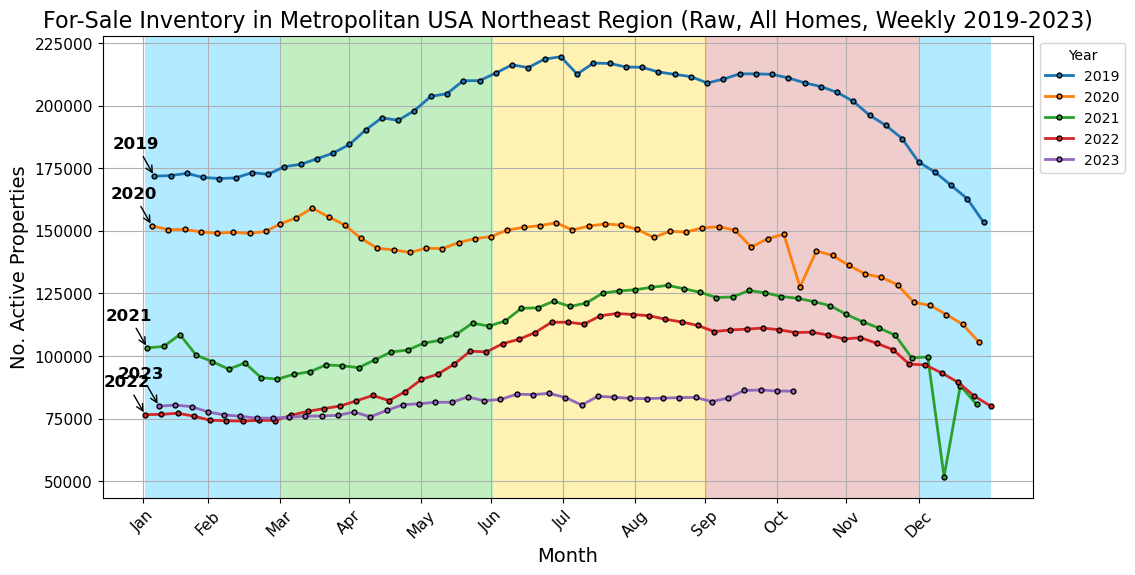

In [14]:
northeast_df = groupby_usa_region[groupby_usa_region["Census Region"] == "Northeast"]

anova_test(northeast_df)

plot_region_time_series(northeast_df)

Midwest Region ANOVA F-statistic Value: 5.875017566328791
Midwest ANOVA p-Value: 0.0006887615533247862

[REJECT Null Hypothesis (H0)]
[Midwest Region] With 95% confidence, there are significant statistical differences in For-Sale Inventory across seasons.



C:\Users\G-MAN\AppData\Local\Temp\ipykernel_11636\2903461476.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


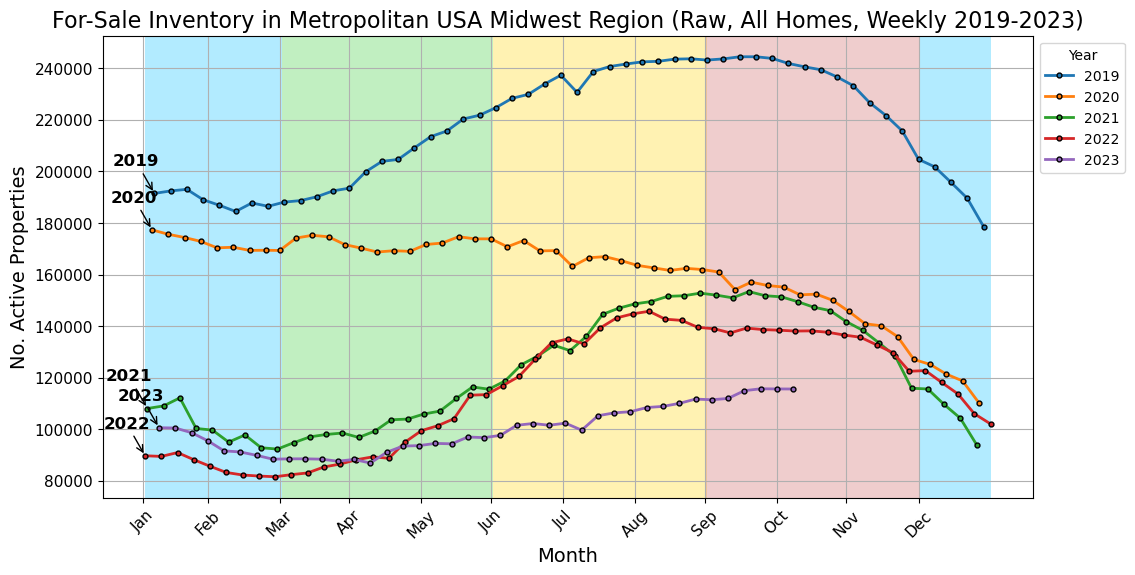

In [15]:
midwest_df = groupby_usa_region[groupby_usa_region["Census Region"] == "Midwest"]

anova_test(midwest_df)

plot_region_time_series(midwest_df)

South Region ANOVA F-statistic Value: 1.3639286436735938
South ANOVA p-Value: 0.2543987237874858

[DO NOT REJECT NULL HYPOTHESIS (H0)]
[South Region] At 5% Risk Level, there are NO significant statistical differences in For-Sale Inventory across seasons.



C:\Users\G-MAN\AppData\Local\Temp\ipykernel_11636\2903461476.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


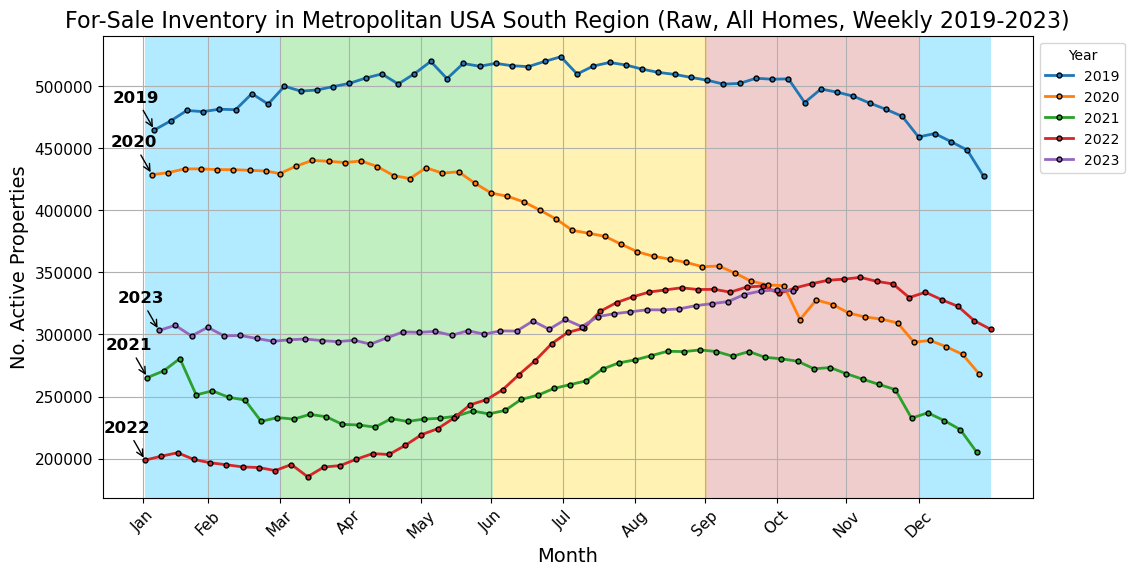

In [16]:
south_df = groupby_usa_region[groupby_usa_region["Census Region"] == "South"]

anova_test(south_df)

plot_region_time_series(south_df)

West Region ANOVA F-statistic Value: 9.395782823063112
West ANOVA p-Value: 6.692988590780285e-06

[REJECT Null Hypothesis (H0)]
[West Region] With 95% confidence, there are significant statistical differences in For-Sale Inventory across seasons.



C:\Users\G-MAN\AppData\Local\Temp\ipykernel_11636\2903461476.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


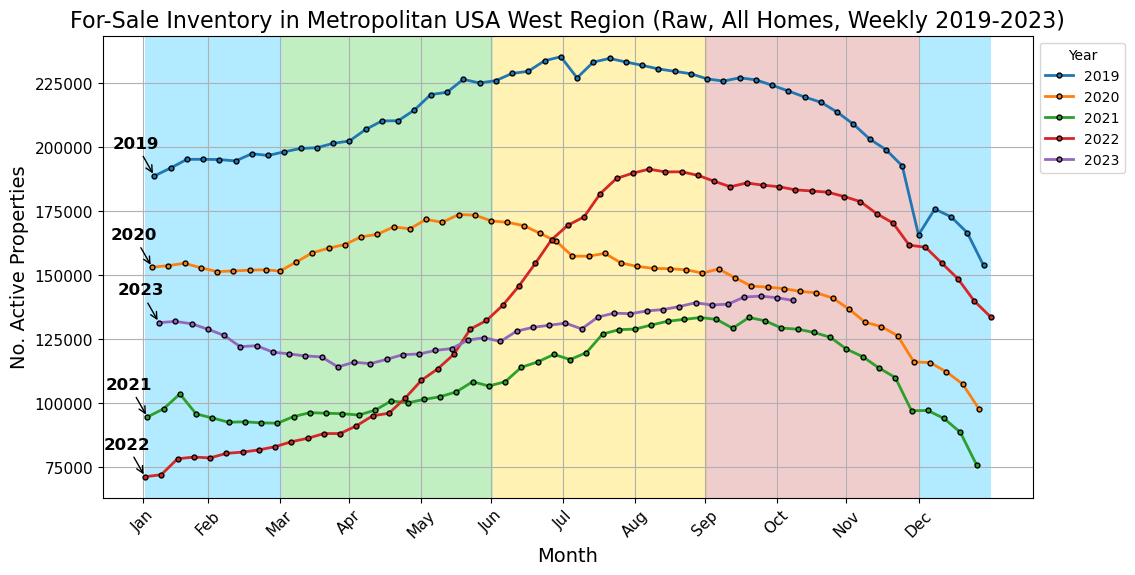

In [17]:
west_df = groupby_usa_region[groupby_usa_region["Census Region"] == "West"]

anova_test(west_df)

plot_region_time_series(west_df)

-----------------------------------------------------

GA - Topic 2

In [26]:
# Required module
import pandas as pd
import nasdaqdatalink as nddl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from scipy.stats import spearmanr
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")
nddl.ApiConfig.api_key = '-QVCnvjUyqV9eczABr4_'

<center><H1>Data Tabulation</H1></center>

<strong>Instructions</strong>: Run the following code blocks below to create the dataframes required for visualisation.

In [27]:
# Code strip for Interest Rates for Australia and United States
# Tabulation

# Read data from file
interest_rate_df = pd.read_csv('./Resources/Central_Bank_Rates.csv')

# Extract the date columns 
date_columns = interest_rate_df.columns[13:]

# Filter and select only the rows for the United States and Australia
filtered_interest_rates_df = interest_rate_df[interest_rate_df['Reference area'].isin(['United States', 'Australia'])]

# Create a new DataFrame with the filtered data
new_filtered_interest_rates_df = filtered_interest_rates_df.set_index('Reference area')
# Removed index name
new_filtered_interest_rates_df.rename_axis(index={'Reference area': None}, inplace=True)

# Transpose the DataFrame so that countries become rows and dates become columns
new_filtered_interest_rates_df = new_filtered_interest_rates_df[date_columns].transpose()

# Convert the index to datetime object
new_filtered_interest_rates_df.index = pd.to_datetime(new_filtered_interest_rates_df.index)
# Convert the datetime index to MM-YYYY format
new_filtered_interest_rates_df.index = new_filtered_interest_rates_df.index.strftime('%m-%Y')
# Filter the DataFrame for dates required
new_filtered_interest_rates_df = new_filtered_interest_rates_df['01-2010':'08-2023']
# Reverse the order of the DataFrame index in descending order
new_filtered_interest_rates_df = new_filtered_interest_rates_df.iloc[::-1]
#new_filtered_interest_rates_df.head()

In [28]:
# Code strip for Zillow Real Estate Data 
# Tabulation

# Date Filter
start_date = '01-2010'
end_date = '12-2023'

median_US_SRAM = nddl.get_table('ZILLOW/DATA', indicator_id='SRAM', region_id='102001', paginate = True)
median_US_SRAM['date'] = pd.to_datetime(median_US_SRAM['date'])
filtered_median_US_SRAM = median_US_SRAM[(median_US_SRAM['date'] >= start_date) & (median_US_SRAM['date'] <= end_date)]
filtered_median_US_SRAM = filtered_median_US_SRAM[['date', 'value']]
filtered_median_US_SRAM['date'] = pd.to_datetime(filtered_median_US_SRAM['date']).dt.strftime('%m-%Y')
filtered_median_US_SRAM = filtered_median_US_SRAM.rename(columns={'date': 'Date', 'value': 'Median Sale Price (Raw, All Homes, Monthly)'})
filtered_median_US_SRAM = filtered_median_US_SRAM.set_index('Date')
#filtered_median_US_SRAM.head()

In [29]:
# Code strip for BIS Real Property Price Index Information Summary
# Tabulation

# Read data from file
prop_price_summary_df  = pd.read_excel('./Resources/BIS_Det_Res_Prop_Price.xlsx', sheet_name='Summary Documentation')
filtered_prop_price_summary_US = prop_price_summary_df[(prop_price_summary_df['Code'] == 'Q:US:0:1:1:2:0:1') & (prop_price_summary_df['Country'] == 'United States')]
filtered_prop_price_summary_AU = prop_price_summary_df[(prop_price_summary_df['Code'] == 'Q:AU:2:1:0:1:6:0') & (prop_price_summary_df['Country'] == 'Australia')]

filtered_prop_price_summary_table_AU_US = {
    'Data': filtered_prop_price_summary_US.columns,
    'United States': filtered_prop_price_summary_US.values[0],
    'Australia': filtered_prop_price_summary_AU.values[0]
}

filtered_prop_price_summary_AU_US_df = pd.DataFrame(filtered_prop_price_summary_table_AU_US)
#pd.set_option('display.max_colwidth', None)
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.set_index('Data')
filtered_prop_price_summary_AU_US_df.rename_axis(index={'Data': None}, inplace=True)
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.style.set_properties(**{'text-align': 'left'})
filtered_prop_price_summary_AU_US_df = filtered_prop_price_summary_AU_US_df.set_table_styles([
    {'selector': 'th', 'props': 'text-align: left;'},
    {'selector': 'td', 'props': [('text-align', 'left'), ('width', '500px')]}  # Adjust '150px' as needed
])

#filtered_prop_price_summary_AU_US_df

In [30]:
# Read the Excel file into a DataFrame
monthly_rppi_au_df = pd.read_excel('./Resources/BIS_Det_Res_Prop_Price.xlsx', sheet_name='Monthly Series')

column_name = 'M:AU:0:1:0:1:6:0'
column_position = 3

start_row = 411
end_row = len(monthly_rppi_au_df)
# Extract the values from the specified column and rows
specific_column_data = monthly_rppi_au_df.iloc[start_row:end_row, column_position]
# Extract the corresponding dates from Column A
dates = monthly_rppi_au_df.iloc[start_row:end_row, 0]
# Convert the date strings to datetime objects
dates = pd.to_datetime(dates)
# Format the dates to display MM-YYYY
formatted_dates = dates.dt.strftime('%m-%Y')
# Create a new DataFrame with formatted dates and values
filter_monthly_rppi_au_df = pd.DataFrame({'Date': formatted_dates, column_name: specific_column_data})
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.dropna()
# Rename the column
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.rename(columns={'M:AU:0:1:0:1:6:0':'Value'})
# Set 'Date' as the index
filter_monthly_rppi_au_df = filter_monthly_rppi_au_df.set_index('Date')
#filter_monthly_rppi_au_df

In [31]:
# Code strip for BIS Real Property Price Index for US and AU

# Read data from file

# Read the CSV file and skip the first 7 rows
real_prop_price_US_AU_df = pd.read_csv('./Resources/BIS_AU_US.csv', skiprows=7)
real_prop_price_US_AU_df.head()

new_real_prop_price_US_AU_df = real_prop_price_US_AU_df.set_index('REF_AREA:Reference area')

new_real_prop_price_US_AU_df.rename_axis(index={'REF_AREA:Reference area': 'Date'}, inplace=True)

columns_to_drop = [
    'DATAFLOW_ID:Dataflow ID',
    'KEY:Timeseries Key',
    'FREQ:Frequency',
    'VALUE:Value',
    'UNIT_MEASURE:Unit',
    'TIME_PERIOD:Period'
]

new_real_prop_price_US_AU_df.drop(columns=columns_to_drop, inplace=True)
new_real_prop_price_US_AU_df = new_real_prop_price_US_AU_df.transpose()
new_real_prop_price_US_AU_df.index = pd.to_datetime(new_real_prop_price_US_AU_df.index, format='%Y-%m-%d')
new_real_prop_price_US_AU_df.rename(columns={'AU:Australia': 'Australia', 'US:United States': 'United States'}, inplace=True)
#new_real_prop_price_US_AU_df.head()

In [32]:
# Code for Crit-F

# Degrees of Freedom
Df_Model = 1  # Replace with the actual degrees of freedom for the model
Df_Residuals = 162  # Replace with the actual degrees of freedom for the residuals

# Significance Level (alpha)
alpha = 0.05  # Change this to your desired significance level

# Calculate the critical F-value
critical_f_value = stats.f.ppf(1 - alpha, Df_Model, Df_Residuals)

In [33]:
# Code for Regression Analysis

# Define your independent variable (interest rates)
X = new_filtered_interest_rates_df['United States']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Define your dependent variable (property prices)
y = filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the p-value for the coefficient of the interest rates
p_value_interest_rates = model.pvalues['United States']

# Set your significance level (e.g., 0.05)
alpha = 0.05

<center><H1>Data Visualization</H1></center>

<strong>Instructions</strong>: Run the following code blocks below to create the PNG files required for visualisation and analysis.

In [34]:
# Convert the index of new_filtered_interest_rates_df to datetime if it's not already in that format
new_filtered_interest_rates_df.index = pd.to_datetime(new_filtered_interest_rates_df.index, format='%m-%Y')

# Create a figure and the first subplot (property prices)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot property prices on the first subplot
ax1.plot(new_real_prop_price_US_AU_df.index, new_real_prop_price_US_AU_df['United States'], label='United States Property Prices', color='blue', linewidth=1)
ax1.plot(new_real_prop_price_US_AU_df.index, new_real_prop_price_US_AU_df['Australia'], label='Australia Property Prices', color='green', linewidth=1)
ax1.set_xlabel('Years')
ax1.set_ylabel('Property Prices', color='black')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a second subplot with the same X-axis
ax2 = ax1.twinx()

# Plot interest rates on the second subplot
ax2.plot(new_filtered_interest_rates_df.index, new_filtered_interest_rates_df['Australia'], label='RBA Interest Rates', color='red', linestyle = '--', linewidth=2)
ax2.plot(new_filtered_interest_rates_df.index, new_filtered_interest_rates_df['United States'], label='Federal Reserve Interest Rates', color='orange', linestyle = '--', linewidth=2)
ax2.set_ylabel('Interest Rates', color='black')
ax2.legend(loc='upper center')

# Show the combined plot
plt.title('United States and Australian BIS Real Property Price Index \n vs \n Central Bank Interest Rates')
plt.tight_layout()
#plt.show()
plt.savefig('Images/US_AU_BIS_RPPI.png')
plt.close()

In [35]:
# Convert the index to datetime with the specified format
filtered_median_US_SRAM.index = pd.to_datetime(filtered_median_US_SRAM.index, format='%m-%Y')

# Plot
plt.plot(filtered_median_US_SRAM.index, filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)'], label = 'Median Sale Price', color = 'green')
plt.title('Long-term Median Sale Price (Raw, All Homes, Monthly 2010-2023)')
plt.xlabel('Years')
plt.ylabel('Median Sale Price')

# Use dateformatter to display only the years on the X-Axis
date_format = mdates.DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))

# Rotate the x-labels for readability
plt.xticks(rotation='vertical')

# Add legend
plt.legend()
plt.tight_layout()
#plt.show
plt.savefig('Images/Zillow_Median_Long.png')
plt.close()

In [36]:
# Covid Period
start_date = '01-2020'
end_date = '12-2023'

alt_median_US_SRAM = nddl.get_table('ZILLOW/DATA', indicator_id='SRAM', region_id='102001', paginate = True)
alt_median_US_SRAM['date'] = pd.to_datetime(alt_median_US_SRAM['date'])
alt_filtered_median_US_SRAM = alt_median_US_SRAM[(alt_median_US_SRAM['date'] >= start_date) & (alt_median_US_SRAM['date'] <= end_date)]
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM[['date', 'value']]
alt_filtered_median_US_SRAM['date'] = pd.to_datetime(alt_filtered_median_US_SRAM['date']).dt.strftime('%m-%Y')
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM.rename(columns={'date': 'Date', 'value': 'Median Sale Price (Raw, All Homes, Monthly)'})
alt_filtered_median_US_SRAM = alt_filtered_median_US_SRAM.set_index('Date')
alt_filtered_median_US_SRAM

# Visualisation


alt_filtered_median_US_SRAM.index = pd.to_datetime(alt_filtered_median_US_SRAM.index, format='%m-%Y')

plt.figure(figsize=(12, 6)) 
ax = plt.gca()

plt.plot(alt_filtered_median_US_SRAM.index, alt_filtered_median_US_SRAM['Median Sale Price (Raw, All Homes, Monthly)'], label = 'Median Sale Price', color = 'green')
plt.title('Zillow Median Sale Price (Raw, All Homes, Monthly 2020-2023)')
plt.xlabel('Years')
plt.ylabel('Median Sale Price')

# Use dateformatter to display only the years on the X-Axis
date_format = mdates.DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major locator to display months

# Rotate the x-labels for readability
plt.xticks(rotation='vertical')

# Add legend
plt.legend()

# Add annotation at the specified date '02-2020'
annotation_date_1 = pd.to_datetime('02-2020', format='%m-%Y')
annotation_value_1 = alt_filtered_median_US_SRAM.loc['02-2020', 'Median Sale Price (Raw, All Homes, Monthly)']




# Modify the annotation text for the first annotation to display in two lines
annotation_text_1 = 'US Declares Public \nHealth Emergency(02-2020)'

ax.annotate(annotation_text_1,
            xy=(annotation_date_1, annotation_value_1), xycoords='data',
            xytext=(150, 250), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='bottom')

# Add a second annotation at '03-2020' with a different text and adjusted xytext
annotation_date_2 = pd.to_datetime('03-2020', format='%m-%Y')
annotation_value_2 = alt_filtered_median_US_SRAM.loc['03-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

# Modify the annotation text for the second annotation
annotation_text_2 = 'Fed Rate Cuts Start\n March 6, 2020: Stimulus and Relief Package 1 (Phase One)\n March 18, 2020: Stimulus and Relief Package 2 (FFCRA)\n  March 27, 2020: Stimulus and Relief Package 3: CARES Act'

ax.annotate(annotation_text_2,
            xy=(annotation_date_2, annotation_value_2), xycoords='data',
            xytext=(220, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


annotation_text_3 = 'April 24, 2020: Stimulus and Relief Package 3.5'
annotation_date_3 = pd.to_datetime('04-2020', format='%m-%Y')
annotation_value_3 = alt_filtered_median_US_SRAM.loc['04-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_3,
            xy=(annotation_date_3, annotation_value_3), xycoords='data',
            xytext=(150, 210), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')

annotation_text_4 = 'Dec. 21, 2020: Consolidated Appropriations Act'
annotation_date_4 = pd.to_datetime('12-2020', format='%m-%Y')
annotation_value_4 = alt_filtered_median_US_SRAM.loc['12-2020', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_4,
            xy=(annotation_date_4, annotation_value_4), xycoords='data',
            xytext=(150, 125), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')



annotation_text_5 = 'March 11, 2021: American Rescue Plan Act of 2021'
annotation_date_5 = pd.to_datetime('03-2021', format='%m-%Y')
annotation_value_5 = alt_filtered_median_US_SRAM.loc['03-2021', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_5,
            xy=(annotation_date_5, annotation_value_5), xycoords='data',
            xytext=(150, -70), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


annotation_text_6 = 'March 17, 2022: Fed Rates Hike Started'
annotation_date_6 = pd.to_datetime('03-2022', format='%m-%Y')
annotation_value_6 = alt_filtered_median_US_SRAM.loc['03-2022', 'Median Sale Price (Raw, All Homes, Monthly)']

ax.annotate(annotation_text_6,
            xy=(annotation_date_6, annotation_value_6), xycoords='data',
            xytext=(150, -150), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90", facecolor='black', mutation_scale=15),
            horizontalalignment='center', verticalalignment='top')


plt.tight_layout()
#plt.show
plt.savefig('Images/Zillow_Median_Short.png')
plt.close()

<center><H1>Analysis</H1></center>

The following code blocks will present the visualisation created using dataframes. This is followed by an interpretation and analysis of data.

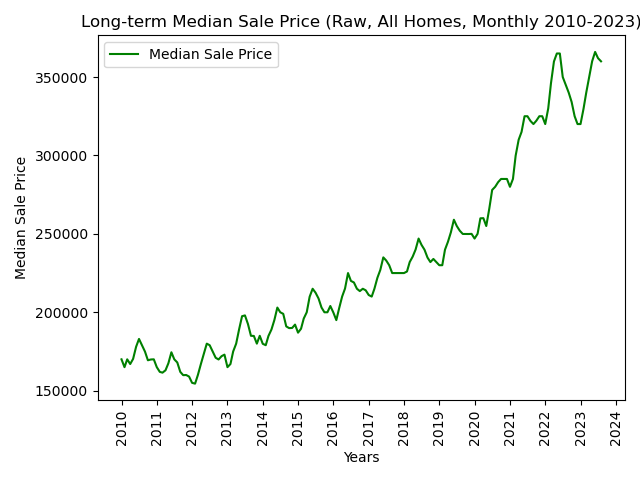

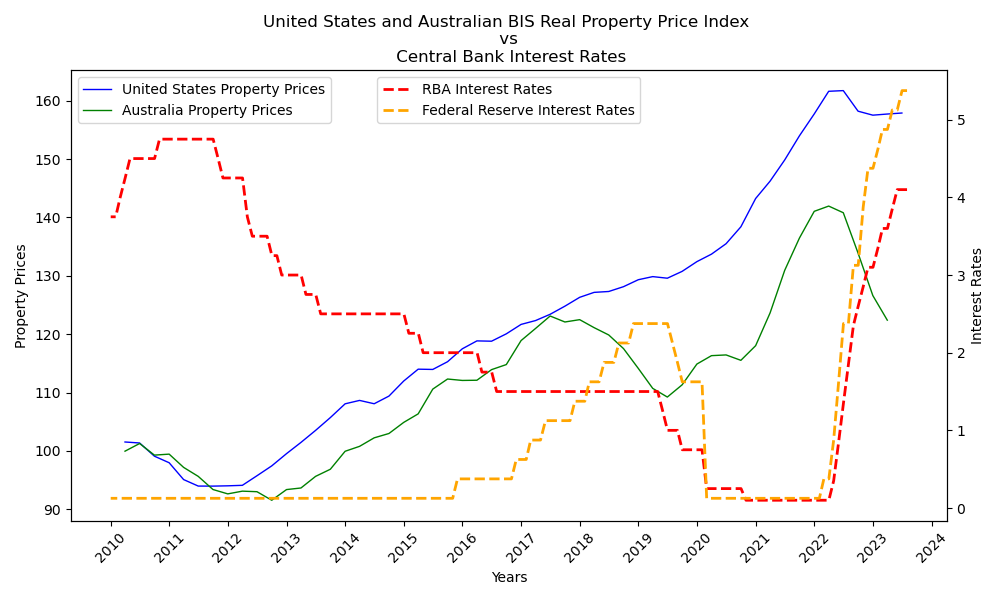

In [37]:
display(Image(filename='Images/Zillow_Median_Long.png'))
display(Image(filename='Images/US_AU_BIS_RPPI.png'))

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
        ol {
            margin-left: 20px;
        }
    </style>
</head>
<body>
    <h1>Long-term Median Sale Price</h1>
    <p>When examining the trends in the Median Sale Price using Zillow's SRAM indicator, a notable pattern emerges. Between 2010 and 2012, the median sale price in the United States displayed a declining trajectory. However, from 2012 onward, there was a distinct shift towards a sustained upward trend. It's important to emphasize that this upward trajectory was not without interruptions; it featured periodic fluctuations with instances of both decline and recovery. The same trend can be observed when using the BIS Real Property Price Index for the U.S real estate market</p>
    <p>Several key insights deserve our attention:</p>
    <ol>
        <li>
            The U.S. housing market was in the process of recovery from the global financial crisis of 2008 and the subsequent housing market crash. As economic conditions improved, consumer confidence surged, spurring greater demand for residential properties.
        </li>
        <li>
            The stabilization of the economy bolstered consumer confidence. As individuals grew more secure in their financial situations and job prospects, a noticeable uptick in housing market participation was observed.
        </li>
        <li>
            Real estate investors, including institutional entities, emerged as prominent actors in the market, significantly increasing their property acquisitions. This heightened investor activity amplified demand and intensified competition within the housing sector.
        </li>
        <li>
            A distinct dip in median property prices became evident in the middle of 2022, aligning with the Federal Reserve's decision to raise interest rates.
        </li>
    </ol>
    <p>Despite these fluctuations, an overall trend emerges, characterized by a consistent long-term growth in median sale prices.</p>
</body>
</html>

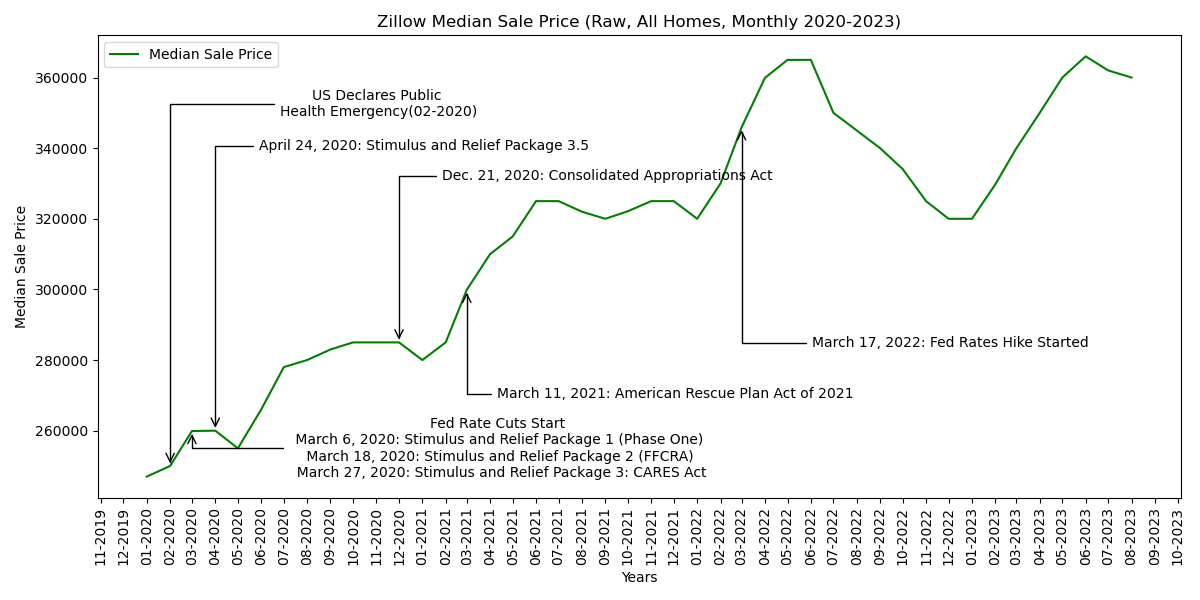

In [38]:
display(Image(filename='Images/Zillow_Median_Short.png'))

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>
<body>
    <h1>Median Sale Price during the Pandemic and the Rise of Interest Rates</h1>
    <p><strong>Economic Stimulus and Pandemic Impact (March 2020 - May 2020):</strong> Median house prices plateaued, reflecting the uncertainty and economic challenges posed by the pandemic, as well as the declaration of a U.S. public health emergency. Buyers and sellers were cautious due to these unprecedented circumstances.</p>
    <p>In May 2020, there was a notable change in the trend, as median house prices began to increase. The pandemic brought demands for more space, particularly from young urban households whose family formation moves were greatly accelerated in the wake of the pandemic.</p>
    <p><strong>Plateau and Affordability Concerns (June 2021 - February 2022):</strong> The plateauing of prices around June 2021 might have been influenced by factors such as affordability concerns and housing market fatigue, especially in markets that had experienced rapid price growth.</p>
    <p><strong>Resurgence and Interest Rate Hikes (February 2022 - January 2023):</strong> In February 2022, the housing market started to increase again. The anticipation of rising rates might have motivated buyers to enter the market before borrowing costs became more expensive.</p>
    <p>The market peaked in June 2022, driven by a combination of factors, including low inventory, strong demand, and increased interest rates.</p>
    <p><strong>Decline and Recovery (June 2022 - January 2023):</strong> After the peak, there was a period of declining prices, which extended until January 2023. This decline could be attributed to affordability issues, as rising prices and interest rates made it more challenging for some buyers.</p>
    <p><strong>Recent Resurgence (January 2023 - June 2023):</strong> From January 2023, there was another upswing in median house prices, ultimately reaching the same peak as in June 2022 by June 2023. This resurgence could be attributed to various factors, including improved economic conditions, continued demand for housing, and potential adjustments in the housing market.</p>
</body>
</html>

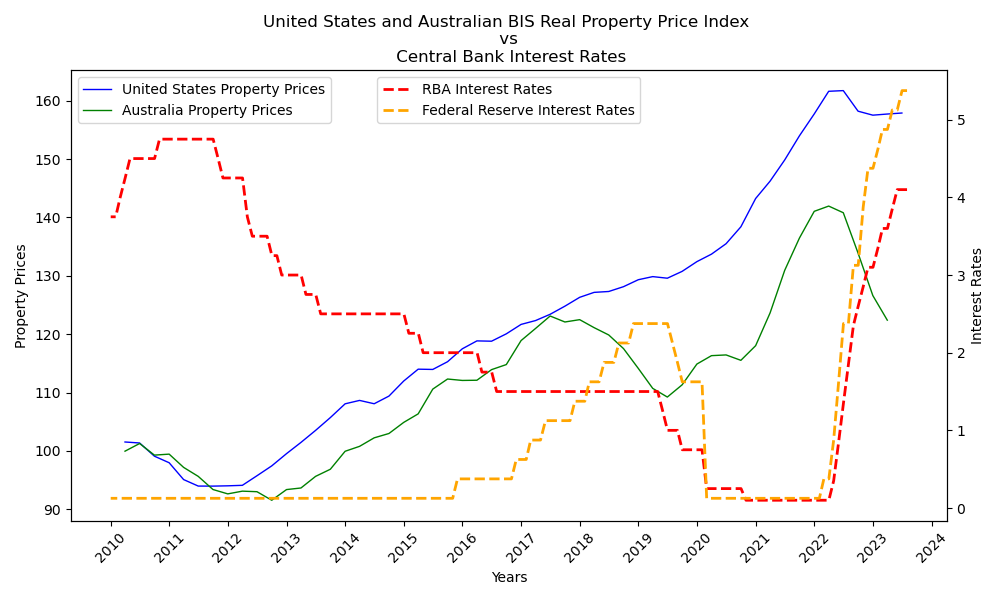

In [39]:
display(Image(filename='Images/US_AU_BIS_RPPI.png'))

In [40]:
# Null and Alt Hypotheses
print("Null Hypothesis (H0):")
print("There is no statistically significant relationship between changes in interest rates and property prices in the United States.\n")
print("Alternative Hypothesis (H1):")
print("There is a statistically significant relationship between changes in interest rates and property prices in the United States.\n")
print(f"P-value for the 'interest rate' coefficient: {p_value_interest_rates}")
print(f"Critical F-value at alpha = {alpha}: {critical_f_value}")

print('\nF-statistic: 85.42 is much larger than Critical F-value: 3.8995, it indicates that the model is statistically significant at the 0.05 significance level.') 
print('\nThis suggests that interest rates has a statistically significant effect on the property prices. This is a strong indication that the regression model is meaningful and that the independent variables collectively explain a significant portion of the variation in property prices.')

# Hypothesis testing based on p-value
if p_value_interest_rates < alpha:
    print("\nReject the null hypothesis. Interest rates have a statistically significant effect on property prices.\n")
else:
    print("\nFail to reject the null hypothesis. Interest rates do not have a statistically significant effect on property prices.\n")
print(model.summary())
print("[2] See below statiscal reference for more information on the OLS Regression Results.")

Null Hypothesis (H0):
There is no statistically significant relationship between changes in interest rates and property prices in the United States.

Alternative Hypothesis (H1):
There is a statistically significant relationship between changes in interest rates and property prices in the United States.

P-value for the 'interest rate' coefficient: 1.3320868257407982e-16
Critical F-value at alpha = 0.05: 3.899502435176602

F-statistic: 85.42 is much larger than Critical F-value: 3.8995, it indicates that the model is statistically significant at the 0.05 significance level.

This suggests that interest rates has a statistically significant effect on the property prices. This is a strong indication that the regression model is meaningful and that the independent variables collectively explain a significant portion of the variation in property prices.

Reject the null hypothesis. Interest rates have a statistically significant effect on property prices.

                                 

In summary, the regression results indicate that United States interest rates are statistically significant in explaining variations in property prices, as the p-value associated with the "United States" interest rates coefficient is very close to zero. However, the low R-squared value suggests that while interest rates play a role, they don't explain the entirety of the variation in property prices, and other factors likely contribute as well. The low Durbin-Watson statistic raises concerns about potential autocorrelation in the model's residuals, which may need further investigation or correction.

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h1 {
            text-align: center;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>
<body>
    <h1>BIS Real Property Price Index for Australia and the United States and Interest Rates for both countries</h1>
    <h2><strong>United States</strong></h2>
    <p>The interest rates in the United States have been relatively higher than in Australia over the entire period, with a range from 0.125% to 5.375%. The Real Property Price Index for the United States has generally increased over the years, although it saw some fluctuations. It started around 101 in 2010 and reached approximately 157 in 06-2023. In index terms, it would mean that the same property around 2010 is now 50% more in value. Furthermore, Zillows SRAM indicator which measures the Median Sale Price (Raw, All Homes, Monthly) supports this observations wherein the price from 2010 has almost doubled in 2023.</p>
    <h2><strong>Australia</strong></h2>
    <p>The interest rates in Australia also saw variation during the period but remained generally lower than in the United States, with a range from 0.125% to 4.10%. The Real Property Price Index in Australia increased over the years, indicating a general upward trend in property prices. It started around 99 in 2010 and reached approximately 122 in 03-2023. In index terms, it would mean that the same property around 2010 is now 22% more in value.</p>

</body>
</html>

<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 30px;
        }
        h2 {
            font-size: 24px;
        }
        p {
            margin: 15px 0;
        }
    </style>
</head>

<body>
    <h2>Conclusion</h2>
    <p>The United States generally maintained its housing market price uptrend compared to Australia may be due to the following conditions:</p>
    <ul>
        <li>Strong economic conditions often lead to higher property prices as people have more disposable income and are more likely to invest in real estate.</li>
        <li>Central banks, like the Federal Reserve in the United States and the Reserve Bank of Australia, influence interest rates as a tool to manage inflation and economic growth. Changes in interest rates can affect borrowing costs and property demand.</li>
        <li>In the United States, 30-year fixed-rate mortgages are common, providing borrowers with long-term rate stability and smaller monthly payments. In Australia, it's more common to have shorter fixed-rate terms. This difference can affect the sensitivity of the housing market to changes in interest rates.</li>
        <li>Longer-term fixed-rate loans in the U.S. may make homeowners less sensitive to short-term interest rate fluctuations, which can dampen the immediate impact of interest rate changes on property prices.</li>
        <li>In Australia, where fixed-rate terms are shorter, property prices might respond more quickly to changes in interest rates, as borrowers are exposed to interest rate adjustments more frequently.</li>
        <li>The availability of assumable loans in the U.S. can influence the housing market. An assumable loan allows a buyer to take over the seller's existing mortgage at its original terms. This can make homes more attractive to buyers and potentially support property values.</li>
    </ul>
</body>

</html>

The regression results show the output of an Ordinary Least Squares (OLS) regression model. This model examines the relationship between interest rates in the United States and property prices.

Here's an interpretation of the key elements of the regression results:

1. **R-squared (R²)**: 
    - R-squared measures the goodness of fit of the model, representing the proportion of the variance in the dependent variable (property prices) that can be explained by the independent variable (interest rates). An R-squared value of 0.345 indicates that approximately 34.5% of the variation in property prices can be explained by changes in interest rates. This suggests that interest rates have some influence on property prices, but there are other factors at play as well.

2. **F-statistic**: 
    - The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 85.42, and the associated p-value is very close to zero (1.33e-16). This low p-value indicates that the model as a whole is statistically significant, implying that at least one of the independent variables (interest rates) has a significant impact on the dependent variable (property prices).

3. **Coefficients**:
   - The coefficient of the "const" term is approximately 2.07e+05. This represents the estimated property price when the United States interest rate is zero. In practical terms, it's the intercept of the regression line.
   - The coefficient for "United States" interest rates is approximately 2.758e+04. This suggests that for each unit increase in United States interest rates, property prices are estimated to increase by approximately 27,580 units.

4. **P-values**:
   - The p-value associated with the "United States" interest rates coefficient is very close to zero, indicating that the interest rates variable is statistically significant. This supports the Alternative Hypothesis (H1) that interest rates have a statistically significant effect on property prices.

5. **Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis**:
   - These statistics are used to assess the assumptions of the regression model. An important point to note is the very low Durbin-Watson statistic (close to zero), which suggests potential issues with autocorrelation in the residuals, meaning that the errors may not be independent over time. This could affect the reliability of the model.

6. **Notes**:
   - The standard errors assume that the covariance matrix of the errors is correctly specified. This is an assumption of the OLS model.

-------------------

------------

JT - Topic 3

In [119]:
import pandas as pd
import nasdaqdatalink as nddl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import os
import hvplot.pandas

# store the api key (just the key in a text file with this name)
nddl.read_key(filename="nasdaqdatalinkapikey.txt")

In [120]:
# get the indicator table
zindicators = nddl.get_table("ZILLOW/INDICATORS")
zindicators

indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5            Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6            Z4BR                     ZHVI 4-Bedroom Time Series ($)   
7            Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8            Z2BR                     ZHVI 2-Bedroom Time Series ($)   
9            Z1BR                     ZHVI 1-Bedroom Time Series ($)   
10           SSSW  Median Sale Price (Smooth, SFR only, Weekly View)   
11           SSSM      Median Sale Price (Smooth, SFR only, Monthly)   
12           SSAW  Median Sale Price (Smooth, All Homes, Weekly V...   
13           SSAM     Median Sale Price (Smooth, All Homes, Monthly)   
14           SRSW     Median Sale Price (Raw, SFR only, Weekly View)   
15           SRSM         Median Sale Price (Raw, SFR only, Monthly)   
16           SRAW    Median Sale Price (Raw, All Homes, Weekly View)   
17           SRAM        Median Sale Price (Raw, All Homes, Monthly)   
18           SASW  Median Sale Price (Smooth & Seasonally Adjuste...   
19           SASM  Median Sale Price (Smooth & Seasonally Adjuste...   
20           SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
21           SAAM  Median Sale Price (Smooth & Seasonally Adjuste...   
22           RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   
23           RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
24           NSAW  Median Days to Pending (Smooth, All Homes, Wee...   
25           NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
26           NRAW  Median Days to Pending (Raw, All Homes, Weekly...   
27           NRAM   Median Days to Pending (Raw, All Homes, Monthly)   
28           MSAW  Mean Days to Pending (Smooth, All Homes, Weekl...   
29           MSAM  Mean Days to Pending (Smooth, All Homes, Monthly)   
30           MRAW  Mean Days to Pending (Raw, All Homes, Weekly V...   
31           MRAM     Mean Days to Pending (Raw, All Homes, Monthly)   
32           LSSW  Median List Price (Smooth, SFR Only, Weekly View)   
33           LSSM      Median List Price (Smooth, SFR Only, Monthly)   
34           LSAW  Median List Price (Smooth, All Homes, Weekly V...   
35           LSAM     Median List Price (Smooth, All Homes, Monthly)   
36           LRSW     Median List Price (Raw, SFR Only, Weekly View)   
37           LRSM         Median List Price (Raw, SFR Only, Monthly)   
38           LRAW    Median List Price (Raw, All Homes, Weekly View)   
39           LRAM        Median List Price (Raw, All Homes, Monthly)   
40           ISSW  For-Sale Inventory (Smooth, SFR only, Weekly V...   
41           ISSM     For-Sale Inventory (Smooth, SFR only, Monthly)   
42           ISAW  For-Sale Inventory (Smooth, All Homes, Weekly ...   
43           ISAM    For-Sale Inventory (Smooth, All Homes, Monthly)   
44           IRSW    For-sale Inventory (Raw, SFR only, Weekly View)   
45           IRSM        For-sale Inventory (Raw, SFR only, Monthly)   
46           IRAW   For-Sale Inventory (Raw, All Homes, Weekly View)   
47           IRAM       For-Sale Inventory (Raw, All Homes, Monthly)   
48           CSSW  Share of Listings With a Price Cut (Smooth, SF...   
49           CSSM  Share of Listings With a Price Cut (Smooth, SF...   
50           CSAW  Share of Listings With a Price Cut (Smooth, Al...   
51           CSAM  Share of Listings With a Price Cut (Smooth, Al...   
52           CRSW  Share of Listings With a Price Cut (Raw, SFR O...   
53           CRSM  Share of Listings With a P

In [121]:
# retrieve smooth median house price data
# get the data table by indicator (the whole table is huge), paginate= True will retrieve more than 10K rows, otherwise limit to 10K rows.
sssm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SSSM', paginate=True)
sssm_data

indicator_id region_id       date     value
None                                             
0             SSSM    845167 2023-08-31  134667.0
1             SSSM    845167 2023-07-31  134000.0
2             SSSM    845167 2023-06-30  140167.0
3             SSSM    845167 2023-05-31  138000.0
4             SSSM    845167 2023-04-30  136333.0
...            ...       ...        ...       ...
92553         SSSM    102001 2008-06-30  186667.0
92554         SSSM    102001 2008-05-31  183333.0
92555         SSSM    102001 2008-04-30  180167.0
92556         SSSM    102001 2008-03-31  189750.0
92557         SSSM    102001 2008-02-29  187500.0

[92558 rows x 4 columns]

In [122]:
# get SRSM, raw median price data
srsm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SRSM', paginate=True)
srsm_data

indicator_id region_id       date     value
None                                             
0             SRSM    845167 2023-08-31  134000.0
1             SRSM    845167 2023-07-31  130000.0
2             SRSM    845167 2023-06-30  140000.0
3             SRSM    845167 2023-05-31  132000.0
4             SRSM    845167 2023-04-30  148500.0
...            ...       ...        ...       ...
93090         SRSM    102001 2008-06-30  192000.0
93091         SRSM    102001 2008-05-31  185000.0
93092         SRSM    102001 2008-04-30  183000.0
93093         SRSM    102001 2008-03-31  182000.0
93094         SRSM    102001 2008-02-29  175500.0

[93095 rows x 4 columns]

In [138]:
# For-Sale Inventory (Smooth, SFR only, Monthly) ISSM
issm = nddl.get_table("ZILLOW/DATA", indicator_id='ISSM', paginate=True)
issm

indicator_id region_id       date      value
None                                              
0             ISSM    845172 2023-09-30      154.0
1             ISSM    845172 2023-08-31      143.0
2             ISSM    845172 2023-07-31      132.0
3             ISSM    845172 2023-06-30      123.0
4             ISSM    845172 2023-05-31      112.0
...            ...       ...        ...        ...
61914         ISSM    102001 2018-02-28  1269727.0
61915         ISSM    102001 2018-01-31  1330723.0
61916         ISSM    102001 2017-12-31  1365095.0
61917         ISSM    102001 2017-11-30  1433187.0
61918         ISSM    102001 2017-10-31  1488754.0

[61919 rows x 4 columns]

In [139]:
# retrieve raw inventory data
irsm = nddl.get_table("ZILLOW/DATA", indicator_id='IRSM', paginate=True)
irsm

indicator_id region_id       date      value
None                                              
0             IRSM    845172 2023-09-30      164.0
1             IRSM    845172 2023-08-31      156.0
2             IRSM    845172 2023-07-31      142.0
3             IRSM    845172 2023-06-30      132.0
4             IRSM    845172 2023-05-31      121.0
...            ...       ...        ...        ...
63474         IRSM    102001 2018-02-28  1224382.0
63475         IRSM    102001 2018-01-31  1206651.0
63476         IRSM    102001 2017-12-31  1228911.0
63477         IRSM    102001 2017-11-30  1377619.0
63478         IRSM    102001 2017-10-31  1488754.0

[63479 rows x 4 columns]

In [140]:
# SRAM, Median Sale Price (Raw, All Homes, Monthly), meaning all house types, previously SSSM is for SFR (single family residence)
sram = nddl.get_table("ZILLOW/DATA", indicator_id='SRAM', paginate=True)
sram

indicator_id region_id       date     value
None                                             
0             SRAM    845167 2023-08-31  134000.0
1             SRAM    845167 2023-07-31  130000.0
2             SRAM    845167 2023-06-30  140000.0
3             SRAM    845167 2023-05-31  133500.0
4             SRAM    845167 2023-04-30  148500.0
...            ...       ...        ...       ...
94964         SRAM    102001 2008-06-30  195000.0
94965         SRAM    102001 2008-05-31  189000.0
94966         SRAM    102001 2008-04-30  186000.0
94967         SRAM    102001 2008-03-31  185000.0
94968         SRAM    102001 2008-02-29  180000.0

[94969 rows x 4 columns]

In [141]:
# get all the regions table
zregions = nddl.get_table("ZILLOW/REGIONS", paginate=True)
zregions

region_id region_type                                            region
None                                                                         
0         99999         zip  98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1         99998         zip              98846;WA;nan;Pateros;Okanogan County
2         99997         zip   98845; WA; Wenatchee; Douglas County; Palisades
3         99996         zip             98844;WA;nan;Oroville;Okanogan County
4         99995         zip      98843;WA;Wenatchee, WA;Orondo;Douglas County
...         ...         ...                                               ...
89300    100000         zip       98848;WA;Moses Lake, WA;Quincy;Grant County
89301     10000        city                 Bloomington;MD;nan;Garrett County
89302      1000      county                     Echols County;GA;Valdosta, GA
89303       100      county              Bibb County;AL;Birmingham-Hoover, AL
89304        10       state                                          Colorado

[89305 rows x 3 columns]

In [148]:
zregions['region_id'] = zregions['region_id'].astype('int64')

In [149]:
zregions.dtypes

region_id       int64
region_type    object
region         object
dtype: object

In [150]:
sssm_data['region_id'] = sssm_data['region_id'].astype('int64')
sssm_data.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [145]:
# combine data and region df
sssm_combine = pd.merge(sssm_data, zregions)
sssm_combine

indicator_id  region_id       date     value region_type         region
0             SSSM     845167 2023-08-31  134667.0       metro     Ottawa, IL
1             SSSM     845167 2023-07-31  134000.0       metro     Ottawa, IL
2             SSSM     845167 2023-06-30  140167.0       metro     Ottawa, IL
3             SSSM     845167 2023-05-31  138000.0       metro     Ottawa, IL
4             SSSM     845167 2023-04-30  136333.0       metro     Ottawa, IL
...            ...        ...        ...       ...         ...            ...
92553         SSSM     102001 2008-06-30  186667.0       metro  United States
92554         SSSM     102001 2008-05-31  183333.0       metro  United States
92555         SSSM     102001 2008-04-30  180167.0       metro  United States
92556         SSSM     102001 2008-03-31  189750.0       metro  United States
92557         SSSM     102001 2008-02-29  187500.0       metro  United States

[92558 rows x 6 columns]

In [146]:
srsm_data['region_id'] = srsm_data['region_id'].astype('int64')
srsm_data.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [152]:
# combine data and region df raw
srsm_combine = pd.merge(srsm_data, zregions)
srsm_combine

indicator_id  region_id       date     value region_type         region
0             SRSM     845167 2023-08-31  134000.0       metro     Ottawa, IL
1             SRSM     845167 2023-07-31  130000.0       metro     Ottawa, IL
2             SRSM     845167 2023-06-30  140000.0       metro     Ottawa, IL
3             SRSM     845167 2023-05-31  132000.0       metro     Ottawa, IL
4             SRSM     845167 2023-04-30  148500.0       metro     Ottawa, IL
...            ...        ...        ...       ...         ...            ...
93090         SRSM     102001 2008-06-30  192000.0       metro  United States
93091         SRSM     102001 2008-05-31  185000.0       metro  United States
93092         SRSM     102001 2008-04-30  183000.0       metro  United States
93093         SRSM     102001 2008-03-31  182000.0       metro  United States
93094         SRSM     102001 2008-02-29  175500.0       metro  United States

[93095 rows x 6 columns]

In [154]:
sram['region_id'] = sram['region_id'].astype('int64')
sram.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [155]:
sram_combine = pd.merge(sram, zregions)
sram_combine.head()

indicator_id  region_id       date     value region_type      region
0         SRAM     845167 2023-08-31  134000.0       metro  Ottawa, IL
1         SRAM     845167 2023-07-31  130000.0       metro  Ottawa, IL
2         SRAM     845167 2023-06-30  140000.0       metro  Ottawa, IL
3         SRAM     845167 2023-05-31  133500.0       metro  Ottawa, IL
4         SRAM     845167 2023-04-30  148500.0       metro  Ottawa, IL

In [156]:
sram_combine[['City', 'State']] = sram_combine['region'].str.split(', ', expand=True)
sram_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'MS', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI',
       'ME', 'NE', 'MT', 'ND', 'NC; NC', 'DE', 'AK', None], dtype=object)

In [157]:
# create new columns City and State
srsm_combine[['City', 'State']]= srsm_combine['region'].str.split(', ', expand=True)
srsm_combine

indicator_id  region_id       date     value region_type         region  \
0             SRSM     845167 2023-08-31  134000.0       metro     Ottawa, IL   
1             SRSM     845167 2023-07-31  130000.0       metro     Ottawa, IL   
2             SRSM     845167 2023-06-30  140000.0       metro     Ottawa, IL   
3             SRSM     845167 2023-05-31  132000.0       metro     Ottawa, IL   
4             SRSM     845167 2023-04-30  148500.0       metro     Ottawa, IL   
...            ...        ...        ...       ...         ...            ...   
93090         SRSM     102001 2008-06-30  192000.0       metro  United States   
93091         SRSM     102001 2008-05-31  185000.0       metro  United States   
93092         SRSM     102001 2008-04-30  183000.0       metro  United States   
93093         SRSM     102001 2008-03-31  182000.0       metro  United States   
93094         SRSM     102001 2008-02-29  175500.0       metro  United States   

                City State  
0             Ottawa    IL  
1             Ottawa    IL  
2             Ottawa    IL  
3             Ottawa    IL  
4             Ottawa    IL  
...              ...   ...  
93090  United States  None  
93091  United States  None  
93092  United States  None  
93093  United States  None  
93094  United States  None  

[93095 rows x 8 columns]

In [158]:
srsm_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI', 'ME',
       'NE', 'MT', 'ND', 'MS', 'NC; NC', 'DE', 'AK', None], dtype=object)

In [160]:
# data cleaning
# replace (probably input error) "NC; NC" with "NC"
srsm_combine['State'] = srsm_combine['State'].str.replace("NC; NC", "NC")

In [161]:
sram_combine['State'] = sram_combine['State'].str.replace("NC; NC", "NC")
sram_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'MS', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI',
       'ME', 'NE', 'MT', 'ND', 'DE', 'AK', None], dtype=object)

In [162]:
sssm_combine[['City', 'State']]= sssm_combine['region'].str.split(', ', expand=True)
# sssm_combine['State'] = sssm_combine['State'].str.strip()
sssm_combine

indicator_id  region_id       date     value region_type         region  \
0             SSSM     845167 2023-08-31  134667.0       metro     Ottawa, IL   
1             SSSM     845167 2023-07-31  134000.0       metro     Ottawa, IL   
2             SSSM     845167 2023-06-30  140167.0       metro     Ottawa, IL   
3             SSSM     845167 2023-05-31  138000.0       metro     Ottawa, IL   
4             SSSM     845167 2023-04-30  136333.0       metro     Ottawa, IL   
...            ...        ...        ...       ...         ...            ...   
92553         SSSM     102001 2008-06-30  186667.0       metro  United States   
92554         SSSM     102001 2008-05-31  183333.0       metro  United States   
92555         SSSM     102001 2008-04-30  180167.0       metro  United States   
92556         SSSM     102001 2008-03-31  189750.0       metro  United States   
92557         SSSM     102001 2008-02-29  187500.0       metro  United States   

                City State  
0             Ottawa    IL  
1             Ottawa    IL  
2             Ottawa    IL  
3             Ottawa    IL  
4             Ottawa    IL  
...              ...   ...  
92553  United States  None  
92554  United States  None  
92555  United States  None  
92556  United States  None  
92557  United States  None  

[92558 rows x 8 columns]

In [163]:
# replace (probably input error) "NC; NC" with "NC"
sssm_combine['State'] = sssm_combine['State'].str.replace("NC; NC", "NC")

In [164]:
sssm_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI', 'ME',
       'NE', 'MT', 'ND', 'MS', 'DE', 'AK', None], dtype=object)

In [165]:
sssm_combine[sssm_combine['State'].isin([None, 'NC; NC'])]

indicator_id  region_id       date     value region_type         region  \
92371         SSSM     102001 2023-08-31  368000.0       metro  United States   
92372         SSSM     102001 2023-07-31  368000.0       metro  United States   
92373         SSSM     102001 2023-06-30  362333.0       metro  United States   
92374         SSSM     102001 2023-05-31  353333.0       metro  United States   
92375         SSSM     102001 2023-04-30  342000.0       metro  United States   
...            ...        ...        ...       ...         ...            ...   
92553         SSSM     102001 2008-06-30  186667.0       metro  United States   
92554         SSSM     102001 2008-05-31  183333.0       metro  United States   
92555         SSSM     102001 2008-04-30  180167.0       metro  United States   
92556         SSSM     102001 2008-03-31  189750.0       metro  United States   
92557         SSSM     102001 2008-02-29  187500.0       metro  United States   

                City State  
92371  United States  None  
92372  United States  None  
92373  United States  None  
92374  United States  None  
92375  United States  None  
...              ...   ...  
92553  United States  None  
92554  United States  None  
92555  United States  None  
92556  United States  None  
92557  United States  None  

[187 rows x 8 columns]

In [166]:
sssm_combine.describe(include='all')

indicator_id      region_id                           date  \
count         92558   92558.000000                          92558   
unique            1            NaN                            NaN   
top            SSSM            NaN                            NaN   
freq          92558            NaN                            NaN   
mean            NaN  412822.018172  2016-07-30 01:07:08.851098880   
min             NaN  102001.000000            2008-02-29 00:00:00   
25%             NaN  394547.000000            2012-10-31 00:00:00   
50%             NaN  394800.000000            2016-10-31 00:00:00   
75%             NaN  395053.000000            2020-06-30 00:00:00   
max             NaN  845167.000000            2023-08-31 00:00:00   
std             NaN   83052.312079                            NaN   

               value region_type      region         City  State  
count   9.255800e+04       92558       92558        92558  92371  
unique           NaN           1         732          653     50  
top              NaN       metro  Dayton, OH  Springfield     CA  
freq             NaN       92558         358          732   5688  
mean    2.016732e+05         NaN         NaN          NaN    NaN  
min     2.050000e+04         NaN         NaN          NaN    NaN  
25%     1.283330e+05         NaN         NaN          NaN    NaN  
50%     1.659170e+05         NaN         NaN          NaN    NaN  
75%     2.302960e+05         NaN         NaN          NaN    NaN  
max     1.680000e+06         NaN         NaN          NaN    NaN  
std     1.256745e+05         NaN         NaN          NaN    NaN

In [167]:
srsm_combine.describe(include='all')

indicator_id      region_id                           date  \
count         93095   93095.000000                          93095   
unique            1            NaN                            NaN   
top            SRSM            NaN                            NaN   
freq          93095            NaN                            NaN   
mean            NaN  412835.789645  2016-07-12 08:38:12.677372672   
min             NaN  102001.000000            2008-02-29 00:00:00   
25%             NaN  394547.000000            2012-10-31 00:00:00   
50%             NaN  394800.000000            2016-09-30 00:00:00   
75%             NaN  395053.000000            2020-05-31 00:00:00   
max             NaN  845167.000000            2023-08-31 00:00:00   
std             NaN   83079.769415                            NaN   

               value region_type      region         City  State  
count   9.309500e+04       93095       93095        93095  92908  
unique           NaN           1         732          653     50  
top              NaN       metro  Dayton, OH  Springfield     CA  
freq             NaN       93095         360          736   5717  
mean    2.023736e+05         NaN         NaN          NaN    NaN  
min     1.600000e+04         NaN         NaN          NaN    NaN  
25%     1.289500e+05         NaN         NaN          NaN    NaN  
50%     1.662500e+05         NaN         NaN          NaN    NaN  
75%     2.310000e+05         NaN         NaN          NaN    NaN  
max     1.895000e+06         NaN         NaN          NaN    NaN  
std     1.270703e+05         NaN         NaN          NaN    NaN

# Do NOT run if the CSV files already exist

In [168]:
# create directory to store data (csv files)
dirpath = ('./data')
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
    print('created ./data/ directory')
else:
    print('./data directory already exist')

./data directory already exist


In [169]:
# save pd to csv file for use next time without calling API again
zindicators.to_csv('./data/zindicators.csv')
zregions.to_csv('./data/zillow_region.csv')

sssm_data.to_csv('./data/sssm_full.csv')
srsm_data.to_csv('./data/srsm_full.csv')

sssm_combine.to_csv('./data/sssm_combine.csv')
srsm_combine.to_csv('./data/srsm_combine.csv')
sram_combine.to_csv('./data/sram_combine.csv')

irsm.to_csv('./data/irsm_full.csv')
issm.to_csv('./data/issm.csv')

## Findings about sssm_combine  
  - It contains smooth metropolitan area monthly median house price over the years ( in each state as well as the whole of US (region = 'United States'), 90705 rows x 8 columns.  
  - The date range may defer from city to city.   
  - Different states have different numbers of metro area (AK, Alaska, only has 1, CA, california, has 34.  
  - The difference between smoothed and raw data on Zillow is that the former removes 'spikes' in the raw data to make the chart look 'smoother', which is fine for our purpose. Data wise, the smoothed data will have their tail components adjusted to give the graph a "smoother" appearance, otherwise the raw data may have many "steps" or small flat lines. (e.g 130,750 (smooth) vs 130,000 (raw)). According to Zillow, the adjustment may also be for seasonal reason.  
      - The raw data also have slightly more data points than the smoothed data (93075 vs 92558, 0.56% less).  
      - Raw data also has State typo (eg. "NC; NC"), which may be introduced during data input.
### To do:  
  1. -find the city with the longest data period (groupby region, count)    (Dayton, 357 pt)
  2. -plot that city with the national data  
  3. plot the cities in CA.  
  4. get the number of cities in each state.

In [170]:
sssm_combine = pd.read_csv('./data/sssm_combine.csv', parse_dates=['date'])
# drop the first col (index number)
sssm_combine = sssm_combine.drop(sssm_combine.columns[0], axis=1)
sssm_combine

indicator_id  region_id       date     value region_type         region  \
0             SSSM     845167 2023-08-31  134667.0       metro     Ottawa, IL   
1             SSSM     845167 2023-07-31  134000.0       metro     Ottawa, IL   
2             SSSM     845167 2023-06-30  140167.0       metro     Ottawa, IL   
3             SSSM     845167 2023-05-31  138000.0       metro     Ottawa, IL   
4             SSSM     845167 2023-04-30  136333.0       metro     Ottawa, IL   
...            ...        ...        ...       ...         ...            ...   
92553         SSSM     102001 2008-06-30  186667.0       metro  United States   
92554         SSSM     102001 2008-05-31  183333.0       metro  United States   
92555         SSSM     102001 2008-04-30  180167.0       metro  United States   
92556         SSSM     102001 2008-03-31  189750.0       metro  United States   
92557         SSSM     102001 2008-02-29  187500.0       metro  United States   

                City State  
0             Ottawa    IL  
1             Ottawa    IL  
2             Ottawa    IL  
3             Ottawa    IL  
4             Ottawa    IL  
...              ...   ...  
92553  United States   NaN  
92554  United States   NaN  
92555  United States   NaN  
92556  United States   NaN  
92557  United States   NaN  

[92558 rows x 8 columns]

In [171]:
srsm_combine = pd.read_csv('./data/srsm_combine.csv', parse_dates=['date'])
# drop the first col (index number)
srsm_combine = srsm_combine.drop(srsm_combine.columns[0], axis=1)
srsm_combine

indicator_id  region_id       date     value region_type         region  \
0             SRSM     845167 2023-08-31  134000.0       metro     Ottawa, IL   
1             SRSM     845167 2023-07-31  130000.0       metro     Ottawa, IL   
2             SRSM     845167 2023-06-30  140000.0       metro     Ottawa, IL   
3             SRSM     845167 2023-05-31  132000.0       metro     Ottawa, IL   
4             SRSM     845167 2023-04-30  148500.0       metro     Ottawa, IL   
...            ...        ...        ...       ...         ...            ...   
93090         SRSM     102001 2008-06-30  192000.0       metro  United States   
93091         SRSM     102001 2008-05-31  185000.0       metro  United States   
93092         SRSM     102001 2008-04-30  183000.0       metro  United States   
93093         SRSM     102001 2008-03-31  182000.0       metro  United States   
93094         SRSM     102001 2008-02-29  175500.0       metro  United States   

                City State  
0             Ottawa    IL  
1             Ottawa    IL  
2             Ottawa    IL  
3             Ottawa    IL  
4             Ottawa    IL  
...              ...   ...  
93090  United States   NaN  
93091  United States   NaN  
93092  United States   NaN  
93093  United States   NaN  
93094  United States   NaN  

[93095 rows x 8 columns]

In [172]:
srsm_combine.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
City                    object
State                   object
dtype: object

In [173]:
issm =pd.read_csv('./data/issm.csv', parse_dates=['date'])
issm= issm.drop(issm.columns[0], axis=1)
issm.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [174]:
issm.head()

indicator_id  region_id       date  value
0         ISSM     845172 2023-09-30  154.0
1         ISSM     845172 2023-08-31  143.0
2         ISSM     845172 2023-07-31  132.0
3         ISSM     845172 2023-06-30  123.0
4         ISSM     845172 2023-05-31  112.0

In [175]:
irsm =pd.read_csv('./data/irsm.csv', parse_dates=['date'])
irsm= irsm.drop(irsm.columns[0], axis=1)
irsm.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [176]:
sssm_combine.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
City                    object
State                   object
dtype: object

In [177]:
# extract national data in sssm_combine
usa_sssm_comb = sssm_combine[sssm_combine['State'].isnull() ]
usa_sssm_comb

indicator_id  region_id       date     value region_type         region  \
92371         SSSM     102001 2023-08-31  368000.0       metro  United States   
92372         SSSM     102001 2023-07-31  368000.0       metro  United States   
92373         SSSM     102001 2023-06-30  362333.0       metro  United States   
92374         SSSM     102001 2023-05-31  353333.0       metro  United States   
92375         SSSM     102001 2023-04-30  342000.0       metro  United States   
...            ...        ...        ...       ...         ...            ...   
92553         SSSM     102001 2008-06-30  186667.0       metro  United States   
92554         SSSM     102001 2008-05-31  183333.0       metro  United States   
92555         SSSM     102001 2008-04-30  180167.0       metro  United States   
92556         SSSM     102001 2008-03-31  189750.0       metro  United States   
92557         SSSM     102001 2008-02-29  187500.0       metro  United States   

                City State  
92371  United States   NaN  
92372  United States   NaN  
92373  United States   NaN  
92374  United States   NaN  
92375  United States   NaN  
...              ...   ...  
92553  United States   NaN  
92554  United States   NaN  
92555  United States   NaN  
92556  United States   NaN  
92557  United States   NaN  

[187 rows x 8 columns]

In [178]:
# extract national data in srsm_combine
usa_srsm_comb = srsm_combine[srsm_combine['State'].isnull() ]
usa_srsm_comb

indicator_id  region_id       date     value region_type         region  \
92908         SRSM     102001 2023-08-31  365000.0       metro  United States   
92909         SRSM     102001 2023-07-31  367000.0       metro  United States   
92910         SRSM     102001 2023-06-30  372000.0       metro  United States   
92911         SRSM     102001 2023-05-31  365000.0       metro  United States   
92912         SRSM     102001 2023-04-30  350000.0       metro  United States   
...            ...        ...        ...       ...         ...            ...   
93090         SRSM     102001 2008-06-30  192000.0       metro  United States   
93091         SRSM     102001 2008-05-31  185000.0       metro  United States   
93092         SRSM     102001 2008-04-30  183000.0       metro  United States   
93093         SRSM     102001 2008-03-31  182000.0       metro  United States   
93094         SRSM     102001 2008-02-29  175500.0       metro  United States   

                City State  
92908  United States   NaN  
92909  United States   NaN  
92910  United States   NaN  
92911  United States   NaN  
92912  United States   NaN  
...              ...   ...  
93090  United States   NaN  
93091  United States   NaN  
93092  United States   NaN  
93093  United States   NaN  
93094  United States   NaN  

[187 rows x 8 columns]

In [179]:
# remove national data from sssm_combine
sssm_combine = sssm_combine.dropna()
sssm_combine

indicator_id  region_id       date     value region_type        region  \
0             SSSM     845167 2023-08-31  134667.0       metro    Ottawa, IL   
1             SSSM     845167 2023-07-31  134000.0       metro    Ottawa, IL   
2             SSSM     845167 2023-06-30  140167.0       metro    Ottawa, IL   
3             SSSM     845167 2023-05-31  138000.0       metro    Ottawa, IL   
4             SSSM     845167 2023-04-30  136333.0       metro    Ottawa, IL   
...            ...        ...        ...       ...         ...           ...   
92366         SSSM     394298 2023-02-28  289833.0       metro  Aberdeen, WA   
92367         SSSM     394298 2023-01-31  293500.0       metro  Aberdeen, WA   
92368         SSSM     394298 2022-09-30  312000.0       metro  Aberdeen, WA   
92369         SSSM     394298 2022-08-31  326833.0       metro  Aberdeen, WA   
92370         SSSM     394298 2022-07-31  321833.0       metro  Aberdeen, WA   

           City State  
0        Ottawa    IL  
1        Ottawa    IL  
2        Ottawa    IL  
3        Ottawa    IL  
4        Ottawa    IL  
...         ...   ...  
92366  Aberdeen    WA  
92367  Aberdeen    WA  
92368  Aberdeen    WA  
92369  Aberdeen    WA  
92370  Aberdeen    WA  

[92371 rows x 8 columns]

In [180]:
# remove country-wide data from srsm_combine
srsm_combine = srsm_combine.dropna()
srsm_combine.tail()

indicator_id  region_id       date     value region_type        region  \
92903         SRSM     394298 2023-02-28  293000.0       metro  Aberdeen, WA   
92904         SRSM     394298 2023-01-31  292500.0       metro  Aberdeen, WA   
92905         SRSM     394298 2022-09-30  282500.0       metro  Aberdeen, WA   
92906         SRSM     394298 2022-08-31  315000.0       metro  Aberdeen, WA   
92907         SRSM     394298 2022-07-31  338500.0       metro  Aberdeen, WA   

           City State  
92903  Aberdeen    WA  
92904  Aberdeen    WA  
92905  Aberdeen    WA  
92906  Aberdeen    WA  
92907  Aberdeen    WA

In [181]:
sssm_combine.groupby('region')['State'].count().sort_values()

region
Coeur d'Alene, ID      1
Fort Dodge, IA         1
Malvern, AR            1
Athens, OH             1
Lewisburg, PA          1
                    ... 
Chicago, IL          187
Springfield, MA      187
Providence, RI       187
Columbus, OH         187
Dayton, OH           358
Name: State, Length: 731, dtype: int64

In [182]:
srsm_combine.groupby('region')['State'].count().sort_values()

region
Lewisburg, PA       1
Las Vegas, NM       1
Athens, OH          1
Fairmont, WV        1
Kearney, NE         1
                 ... 
Eau Claire, WI    187
El Paso, TX       187
Nashville, TN     187
Lawton, OK        187
Dayton, OH        360
Name: State, Length: 731, dtype: int64

In [183]:
# extract Dayton, OH smooth data points
dayton = sssm_combine[sssm_combine['region']== 'Dayton, OH']
dayton_39 = dayton[dayton['region_id'] == 394521]
dayton_39.sort_values(by='date').tail()

indicator_id  region_id       date     value region_type      region  \
71564         SSSM     394521 2022-02-28  180300.0       metro  Dayton, OH   
71563         SSSM     394521 2022-03-31  172750.0       metro  Dayton, OH   
71562         SSSM     394521 2022-04-30  174000.0       metro  Dayton, OH   
71561         SSSM     394521 2022-05-31  187333.0       metro  Dayton, OH   
71560         SSSM     394521 2022-06-30  199667.0       metro  Dayton, OH   

         City State  
71564  Dayton    OH  
71563  Dayton    OH  
71562  Dayton    OH  
71561  Dayton    OH  
71560  Dayton    OH

In [184]:
# extract Dayton, OH Raw data points
dayton_r = srsm_combine[srsm_combine['region']== 'Dayton, OH']
# dayton_r.region_id.unique()
dayton_39r = dayton_r[dayton_r['region_id'] == 394521]
dayton_39r.sort_values(by='date').tail()

indicator_id  region_id       date     value region_type      region  \
71997         SRSM     394521 2022-02-28  174900.0       metro  Dayton, OH   
71996         SRSM     394521 2022-03-31  175000.0       metro  Dayton, OH   
71995         SRSM     394521 2022-04-30  175000.0       metro  Dayton, OH   
71994         SRSM     394521 2022-05-31  212000.0       metro  Dayton, OH   
71993         SRSM     394521 2022-06-30  212000.0       metro  Dayton, OH   

         City State  
71997  Dayton    OH  
71996  Dayton    OH  
71995  Dayton    OH  
71994  Dayton    OH  
71993  Dayton    OH

In [185]:
# extract new york raw data points
ny_r = srsm_combine[srsm_combine['region']== 'New York, NY']
ny_r.head()

indicator_id  region_id       date     value region_type        region  \
35875         SRSM     394913 2023-08-31  650000.0       metro  New York, NY   
35876         SRSM     394913 2023-07-31  630000.0       metro  New York, NY   
35877         SRSM     394913 2023-06-30  620000.0       metro  New York, NY   
35878         SRSM     394913 2023-05-31  599000.0       metro  New York, NY   
35879         SRSM     394913 2023-04-30  566500.0       metro  New York, NY   

           City State  
35875  New York    NY  
35876  New York    NY  
35877  New York    NY  
35878  New York    NY  
35879  New York    NY

In [186]:
# extract Killeen raw data points
killeen_r = srsm_combine[srsm_combine['region']== 'Killeen, TX']
len(killeen_r)
killeen_r.region_id.unique()
killeen_r

indicator_id  region_id       date     value region_type       region  \
51231         SRSM     394746 2023-08-31  258000.0       metro  Killeen, TX   
51232         SRSM     394746 2023-07-31  255000.0       metro  Killeen, TX   
51233         SRSM     394746 2023-06-30  270000.0       metro  Killeen, TX   
51234         SRSM     394746 2023-05-31  265000.0       metro  Killeen, TX   
51235         SRSM     394746 2023-04-30  250000.0       metro  Killeen, TX   
...            ...        ...        ...       ...         ...          ...   
51413         SRSM     394746 2008-06-30  117000.0       metro  Killeen, TX   
51414         SRSM     394746 2008-05-31  116500.0       metro  Killeen, TX   
51415         SRSM     394746 2008-04-30  106500.0       metro  Killeen, TX   
51416         SRSM     394746 2008-03-31   99900.0       metro  Killeen, TX   
51417         SRSM     394746 2008-02-29  101000.0       metro  Killeen, TX   

          City State  
51231  Killeen    TX  
51232  Killeen    TX  
51233  Killeen    TX  
51234  Killeen    TX  
51235  Killeen    TX  
...        ...   ...  
51413  Killeen    TX  
51414  Killeen    TX  
51415  Killeen    TX  
51416  Killeen    TX  
51417  Killeen    TX  

[187 rows x 8 columns]

In [187]:
# extract Davenport raw data points
davenport_r = srsm_combine[srsm_combine['region'] == 'Davenport, IA']
davenport_r.region_id.unique()

array([394520], dtype=int64)

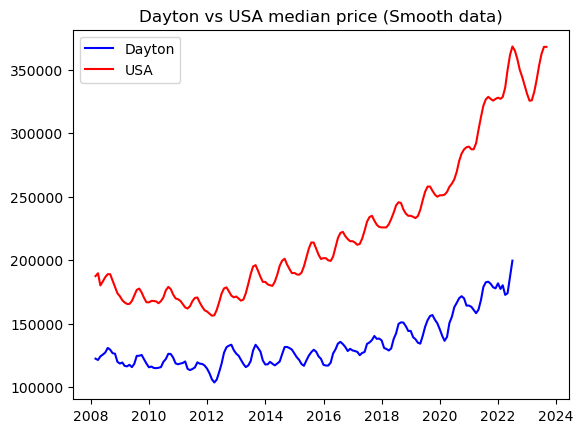

In [188]:
# plotting dayton vs USA smooth
dayton_39 = dayton_39.sort_values(by='date')
usa_sssm_comb= usa_sssm_comb.sort_values(by='date')
plt.plot(dayton_39['date'], dayton_39['value'], color='b',label='Dayton')
plt.plot(usa_sssm_comb['date'], usa_sssm_comb['value'], color='r', label='USA')
plt.title('Dayton vs USA median price (Smooth data)')
plt.legend()
plt.show()

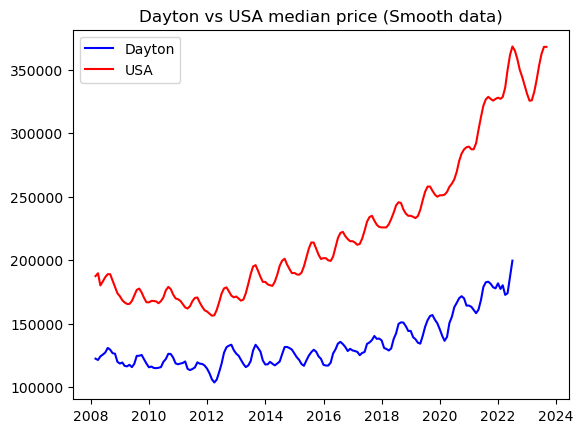

In [189]:
# plotting dayton vs USA smooth
dayton_39 = dayton_39.sort_values(by='date')
usa_sssm_comb= usa_sssm_comb.sort_values(by='date')
plt.plot(dayton_39['date'], dayton_39['value'], color='b',label='Dayton')
plt.plot(usa_sssm_comb['date'], usa_sssm_comb['value'], color='r', label='USA')
plt.title('Dayton vs USA median price (Smooth data)')
plt.legend()
plt.show()

## Finding on Smooth vs Raw data sets  
- The raw data has more spikes compared to the smooth data (thus the name 'smooth')
- As expected the correlation also dropped slightly (0.95 for smooth to 0.93 for raw)

In [190]:
# wrangling data for scatter plot

# getting the listing for Dayton, OH
dayton_inventory = issm[issm['region_id'] == 394521]
len(dayton_inventory.sort_values(by='date'))

58

In [191]:
# getting the listing (raw) for Dayton, OH
dayton_inventory_r = irsm[irsm['region_id'] == 394521]
len(dayton_inventory_r.sort_values(by='date'))

58

In [192]:
# combining price and listing
dayton_sssm_issm = pd.merge(dayton_39, dayton_inventory, on='date',suffixes=['_price','_listing'])
len(dayton_sssm_issm)

57

In [193]:
# combining price and listing (raw)
dayton_srsm_irsm = pd.merge(dayton_39r, dayton_inventory_r, on='date',suffixes=['_price','_listing'])
len(dayton_srsm_irsm)

57

In [194]:
# extract columns for scatter plot
dayton_sssm_issm_sc_df= dayton_sssm_issm[['date','value_price','value_listing']]
dayton_sssm_issm_sc_df.head()

date  value_price  value_listing
0 2017-10-31     138100.0         3268.0
1 2017-11-30     138350.0         3129.0
2 2017-12-31     136850.0         2973.0
3 2018-01-31     130875.0         2871.0
4 2018-02-28     130188.0         2711.0

In [195]:
# extract columns for scatter plot
dayton_srsm_irsm_sc_df= dayton_srsm_irsm[['date','value_price','value_listing']]
dayton_srsm_irsm_sc_df.head()

date  value_price  value_listing
0 2022-06-30     212000.0         2138.0
1 2022-05-31     212000.0         1991.0
2 2022-04-30     175000.0         1723.0
3 2022-03-31     175000.0         1468.0
4 2022-02-28     174900.0         1231.0

In [196]:
# get the linear regression parameters smooth data
(slope, intercept, rvalue, pval, stderr) = stats.linregress(dayton_sssm_issm_sc_df['value_listing'],\
                                                            dayton_sssm_issm_sc_df['value_price'])
rvalue

-0.6584208628006584

r squared value is 0.43352


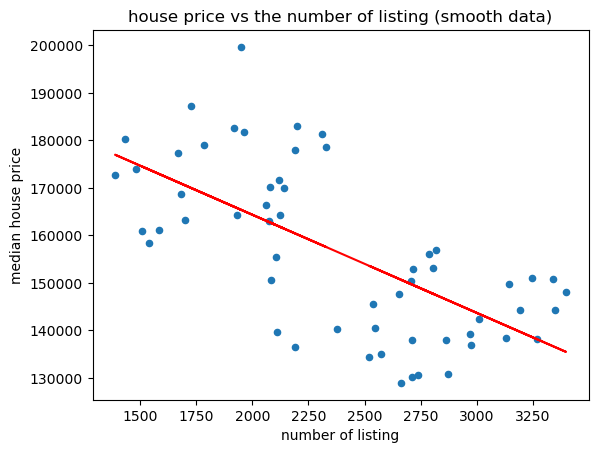

In [197]:
# plot the scatter plot and regression line with smooth data
dayton_sssm_issm_sc_df.plot(kind='scatter',x='value_listing', y='value_price', title='house price vs the number of listing (smooth data)',\
                            ylabel='median house price', xlabel = 'number of listing')
regr_yval = dayton_sssm_issm_sc_df['value_listing']*slope + intercept
plt.plot(dayton_sssm_issm_sc_df['value_listing'], regr_yval, color='r')
print(f'r squared value is {rvalue**2:.5f}')

In [198]:
# linear regression for raw
(slope_r, intercept_r, rvalue_r, pval_r, stderr_r) = stats.linregress(dayton_srsm_irsm_sc_df['value_listing'],\
                                                            dayton_srsm_irsm_sc_df['value_price'])
rvalue_r

-0.5100467308751208

r squared value is 0.26015


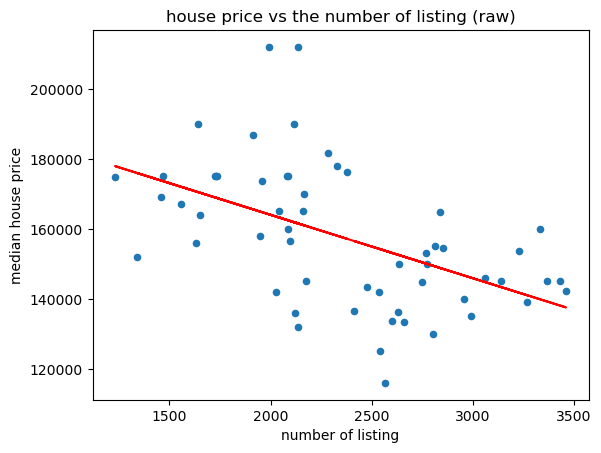

In [199]:
# plot the scatter plot and regression line for raw
dayton_srsm_irsm_sc_df.plot(kind='scatter',x='value_listing', y='value_price', title='house price vs the number of listing (raw)',\
                           ylabel='median house price', xlabel='number of listing')
regr_yval_r = dayton_srsm_irsm_sc_df['value_listing']*slope_r + intercept_r
plt.plot(dayton_srsm_irsm_sc_df['value_listing'], regr_yval_r, color='r')
print(f'r squared value is {rvalue_r**2:.5f}')

## Finding on linear regression for smooth vs raw
- From the graph we can we that there is generally a negative correlation between the house price and number of listing. This makes sense from a supply-demand perspective. As the more supply (listing) there is, the lower the price will be given the same demand. The r-squared value is significant, meaning the regression model is quite reliable.  
    - Comparing the smooth to raw, the smooth data has higher r-squred value (0.43 vs 0.26), meaning the linear regression model using smoothed data is more predictable, because the data seems to have been 'compacted' during the smoothing process as we can see the data points are closer together to the regression line in the smooth dataset.


In [200]:
# Display the location of New York, Killeen and Davenport on a map, with median price as size of the dot
# NY 40.7128° N, 74.0060° W (40.7128, -74.0060)
# Killeen, TX 31.1171° N, 97.7278° W (31.1171, -97.7278)
# Davenport, IA 41.5236° N, 90.5776° W (41.5236, -90.5776)
data ={'City': ['New York, NY', "Killeen, TX", "Davenport, IA"],
      'Lat': [40.7128, 31.1171, 41.5236 ],
      'Lng': [-74.0060, -97.7278, -90.5776],
      'Price':[ ny_r.loc[min(ny_r.index), 'value'], killeen_r.loc[min(killeen_r.index), 'value'], \
               davenport_r.loc[min(davenport_r.index), 'value'] ]
               }
city_df = pd.DataFrame(data)
city_df


City      Lat      Lng     Price
0   New York, NY  40.7128 -74.0060  650000.0
1    Killeen, TX  31.1171 -97.7278  258000.0
2  Davenport, IA  41.5236 -90.5776  185000.0

In [201]:
%%capture --no-display
usa_extent = (-130, 24, -64, 50)
map_pl = city_df.hvplot.points("Lng", "Lat", geo=True, tiles="OSM", size="Price", scale=0.05, color= "City", frame_height=550, \
                              frame_width=750, #x_range=usa_extent[0:2], y_range=usa_extent[2:]
                              xlim=(-127, -64), ylim=(35,40)
                              )
map_pl

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Price)

# Explanation  
  The locations of the cities that we have chosen as the representation of the 3 city sizes (big, medium, small). The dot size indicates the relative median house price in each city.

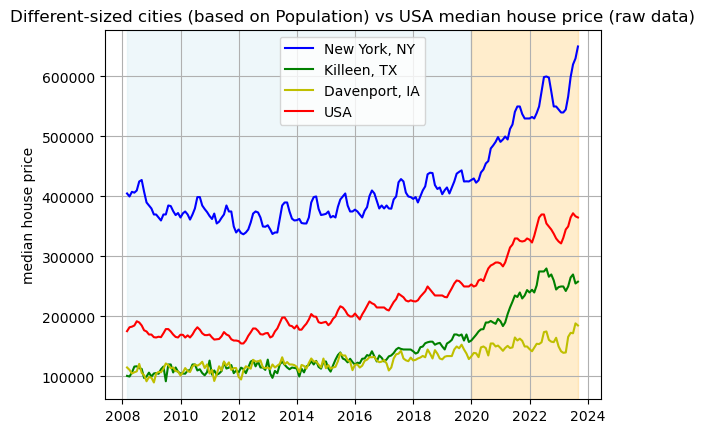

In [202]:
# plotting big city (NY), Medium city (Killeen, TX), small city (Davenport) vs USA for raw
# source: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

#show background for before and after covid in colors.
ny_r = ny_r.sort_values(by='date')
killeen_r =killeen_r.sort_values(by='date')
usa_srsm_comb = usa_srsm_comb.sort_values(by='date')

fig, ax = plt.subplots()
highlight_date = pd.to_datetime('2020-01-01')

ax.plot(ny_r['date'], ny_r['value'], color='b',label='New York, NY')
ax.plot(killeen_r['date'], killeen_r['value'], color='g',label='Killeen, TX')
ax.plot(davenport_r['date'], davenport_r['value'], color='y',label='Davenport, IA')
ax.plot(usa_srsm_comb['date'], usa_srsm_comb['value'], color='r', label='USA')

# highlight background before covid
ax.axvspan(np.min(ny_r['date']), highlight_date, alpha=0.2, color='lightblue')
# highlight background after covid
ax.axvspan(highlight_date, np.max(ny_r['date']), alpha=0.2, color='orange')

ax.set_title('Different-sized cities (based on Population) vs USA median house price (raw data)')
ax.set_ylabel('median house price')
ax.legend()
ax.grid(True)
plt.show()

## Finding on different sized cities compared to national house price trend
- As expected the big city has the highest price, followed by medium and finally the small city.
- One would expect the big city to have a higher correlation with national price than the smaller ones, because they have a bigger weight when compared to the smaller cities in the calculation of the national price, but it turned out that Killeen (a medium city) has the highest correlation (0.982) vs big city New York's 0.957 and small city Davenport's 0.911. This could be because the national price is a median price which is closest to the medium sized city's price (50th percentile price). As it can be reasonably assumed that when ranked by price, the bigger the city the higher its median price.
- House prices dropped across the country in 2008 because of the Great Financial Crisis (GFC), during which the big city price was impacted the most, while the smaller cities were affected the least. It took NY ten years (2018) to recover the drop in price during the GFC.
- Similar to Australia, the house prices in the US continue to price even more markedly during the pandemic (orange part of the graph)


In [203]:
# calculating correlations with national price
us_dayton = pd.merge( dayton_39[['date','value']], usa_sssm_comb[['date', 'value']], on='date',suffixes=['_dayton', '_us'])
us_dayton_corr = us_dayton['value_dayton'].corr(us_dayton['value_us'])
us_dayton_corr


0.9571750843911967

In [204]:
us_dayton_r = pd.merge( dayton_39r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_dayton', '_us'])
us_dayton_corr_r = us_dayton_r['value_dayton'].corr(us_dayton_r['value_us'])
us_dayton_corr_r

0.929473459745023

In [205]:
us_ny_r = pd.merge( ny_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_ny', '_us'])
us_ny_corr_r = us_ny_r['value_ny'].corr(us_ny_r['value_us'])
us_ny_corr_r

0.9597982946566652

In [206]:
us_ki_r = pd.merge( killeen_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_ki', '_us'])
us_ki_corr_r = us_ki_r['value_ki'].corr(us_ki_r['value_us'])
us_ki_corr_r

0.9818744099197461

In [207]:
us_dp_r = pd.merge( davenport_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_dp', '_us'])
us_dp_corr_r = us_dp_r['value_dp'].corr(us_dp_r['value_us'])
us_dp_corr_r

0.9105031619952342

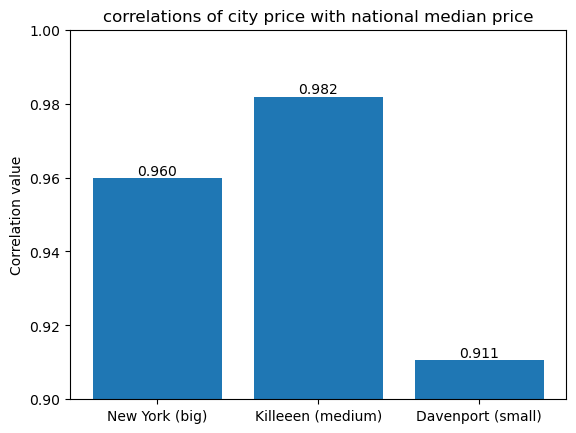

In [208]:
# bar chart for correlation
data=[us_ny_corr_r, us_ki_corr_r, us_dp_corr_r]
labels= ['New York (big)', 'Killeeen (medium)', 'Davenport (small)']
plt.bar(labels, data)
plt.ylim(.9, 1)
plt.title("correlations of city price with national median price")
plt.ylabel('Correlation value')
for i, v in enumerate(data):
    plt.text(i, v, str(f"{v:.3f}"), ha='center', va='bottom')
plt.show()

# Covid time analysis

In [209]:
dayton_covidtime = dayton[(dayton['date'] >= '1-1-2019') & (dayton['date']<='31-12-2023')]
dayton_covidtime

indicator_id  region_id       date     value region_type      region  \
594           SSSM     845158 2023-08-31  219000.0       metro  Dayton, OH   
595           SSSM     845158 2023-07-31  217333.0       metro  Dayton, OH   
596           SSSM     845158 2023-06-30  210667.0       metro  Dayton, OH   
597           SSSM     845158 2023-05-31  198333.0       metro  Dayton, OH   
598           SSSM     845158 2023-04-30  191650.0       metro  Dayton, OH   
...            ...        ...        ...       ...         ...         ...   
71597         SSSM     394521 2019-05-31  140550.0       metro  Dayton, OH   
71598         SSSM     394521 2019-04-30  134331.0       metro  Dayton, OH   
71599         SSSM     394521 2019-03-31  135056.0       metro  Dayton, OH   
71600         SSSM     394521 2019-02-28  137881.0       metro  Dayton, OH   
71601         SSSM     394521 2019-01-31  139319.0       metro  Dayton, OH   

         City State  
594    Dayton    OH  
595    Dayton    OH  
596    Dayton    OH  
597    Dayton    OH  
598    Dayton    OH  
...       ...   ...  
71597  Dayton    OH  
71598  Dayton    OH  
71599  Dayton    OH  
71600  Dayton    OH  
71601  Dayton    OH  

[98 rows x 8 columns]

In [210]:
# creating a new column to identify if the date is before or during covid
dayton_covidtime = dayton_covidtime.loc[ dayton_covidtime['region_id'] ==394521, :]
# dayton_covidtime = dayton_covidtime[ dayton_covidtime['region_id'] ==394521]
dayton_covidtime['covid']='during'
dayton_covidtime.head()

indicator_id  region_id       date     value region_type      region  \
71560         SSSM     394521 2022-06-30  199667.0       metro  Dayton, OH   
71561         SSSM     394521 2022-05-31  187333.0       metro  Dayton, OH   
71562         SSSM     394521 2022-04-30  174000.0       metro  Dayton, OH   
71563         SSSM     394521 2022-03-31  172750.0       metro  Dayton, OH   
71564         SSSM     394521 2022-02-28  180300.0       metro  Dayton, OH   

         City State   covid  
71560  Dayton    OH  during  
71561  Dayton    OH  during  
71562  Dayton    OH  during  
71563  Dayton    OH  during  
71564  Dayton    OH  during

In [211]:
dayton_b4covid = dayton[(dayton['date'] >= '1-1-2014') & (dayton['date']<='31-12-2018')]
dayton_b4covid.head()

indicator_id  region_id       date     value region_type      region  \
650         SSSM     845158 2018-12-31  137950.0       metro  Dayton, OH   
651         SSSM     845158 2018-11-30  137983.0       metro  Dayton, OH   
652         SSSM     845158 2018-10-31  141650.0       metro  Dayton, OH   
653         SSSM     845158 2018-09-30  141983.0       metro  Dayton, OH   
654         SSSM     845158 2018-08-31  147650.0       metro  Dayton, OH   

       City State  
650  Dayton    OH  
651  Dayton    OH  
652  Dayton    OH  
653  Dayton    OH  
654  Dayton    OH

In [212]:
dayton_b4covid = dayton_b4covid[dayton_b4covid['region_id']==394521]
# creating a new column to identify if the date is before or during covid
dayton_b4covid['covid'] = "before"
dayton_b4covid.head()

indicator_id  region_id       date     value region_type      region  \
71602         SSSM     394521 2018-12-31  144288.0       metro  Dayton, OH   
71603         SSSM     394521 2018-11-30  144313.0       metro  Dayton, OH   
71604         SSSM     394521 2018-10-31  148038.0       metro  Dayton, OH   
71605         SSSM     394521 2018-09-30  150900.0       metro  Dayton, OH   
71606         SSSM     394521 2018-08-31  151113.0       metro  Dayton, OH   

         City State   covid  
71602  Dayton    OH  before  
71603  Dayton    OH  before  
71604  Dayton    OH  before  
71605  Dayton    OH  before  
71606  Dayton    OH  before

In [213]:
# plot the before and after covid dayton side by side
# concat the data vertically.
dayton_b4_during_covid= pd.concat([dayton_b4covid[['date','value','covid']], dayton_covidtime[['date','value','covid']]],axis=0)
dayton_b4_during_covid

date     value   covid
71602 2018-12-31  144288.0  before
71603 2018-11-30  144313.0  before
71604 2018-10-31  148038.0  before
71605 2018-09-30  150900.0  before
71606 2018-08-31  151113.0  before
...          ...       ...     ...
71597 2019-05-31  140550.0  during
71598 2019-04-30  134331.0  during
71599 2019-03-31  135056.0  during
71600 2019-02-28  137881.0  during
71601 2019-01-31  139319.0  during

[102 rows x 3 columns]

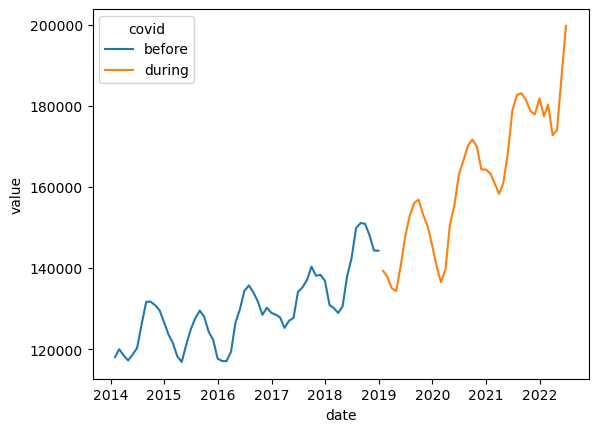

In [214]:
# using seaborn to plot a line graph with different colors for before and during covid.
sns.lineplot(data = dayton_b4_during_covid, x='date', y='value', hue='covid')
plt.legend(title='covid')
plt.show()

## Analysis of house prices before and during covid  
  - It appears that although the pandemic does not affect the cycle of the house price much (still around 1 year), it does amaplify the magnitude of the cycle (there is a bigger difference between the trough and crest of the cycle).  
  - It also appears during covid the price seems less stable as there is more volatility as seen from multiple mini-cycles towards the beginning of 2022.

---------------------------------

END